In [1]:
import numpy as np 
import pandas as pd 
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.simplefilter(action='ignore', category=Warning)

/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-storm-6-0/train_storming_round.csv")
test = pd.read_csv("/kaggle/input/data-storm-6-0/test_storming_round.csv")

In [3]:
df = train.copy()
df.shape

(15308, 23)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0       1   455ca878         45         2/1/2021                9/1/2023   
1       2   c823ce77         48         4/1/2022                2/1/2024   
2       3   62154055         53         5/1/2020                9/1/2023   
3       4   c58bfa6e         44         7/1/2019                3/1/2022   
4       5   b1e5f770         20         9/1/2020                2/1/2023   

  year_month  unique_proposals_last_7_days  unique_proposals_last_15_days  \
0   1/1/2023                             3                              6   
1   1/1/2023                             1                              4   
2   1/1/2023                             3                              5   
3   1/1/2023                             1                              0   
4   1/1/2023                             0                              6   

   unique_proposals_last_21_days  unique_proposal  \
0                              2               12   
1                             12               21   
2                              5               17   
3                             12               17   
4                             10               17   

   unique_quotations_last_7_days  unique_quotations_last_15_days  \
0                              3                               0   
1                              3                               1   
2                              1                               6   
3                              1                               1   
4                              3                               6   

   unique_quotations_last_21_days  unique_quotations  \
0                               4                  9   
1                               8                 14   
2                               5                 14   
3                               5                 11   
4                               2                 13   

   unique_customers_last_7_days  unique_customers_last_15_days  \
0                             3                              4   
1                             4                              3   
2                             3                              7   
3                             2                              2   
4                             3                             10   

   unique_customers_last_21_days  unique_customers  new_policy_count  \
0                              8                15                 0   
1                             10                17                25   
2                             11                21                26   
3                              9                13                18   
4                              6                19                20   

   ANBP_value  net_income  number_of_policy_holders  \
0           0       93313                        30   
1     1071450      164804                         0   
2     1601210      426690                        84   
3      283230       47793                        39   
4     1957680      562239                        19   

   number_of_cash_payment_policies  
0                              162  
1                              175  
2                               78  
3                              144  
4                               40

In [5]:
desc = pd.DataFrame({
    'feature': df.columns,
    'type': df.dtypes.values,
    'count': df.count().values,
    'nunique': df.nunique().values,
    'null': df.isnull().sum().values
})

pd.set_option('display.max_rows', None)

print(desc)
desc.to_excel("column_info.xlsx", index=False)

pd.reset_option('display.max_rows', None)

                            feature    type  count  nunique  null
0                            row_id   int64  15308    15308     0
1                        agent_code  object  15308      905     0
2                         agent_age   int64  15308       41     0
3                  agent_join_month  object  15308       64     0
4           first_policy_sold_month  object  15308       28     0
5                        year_month  object  15308       20     0
6      unique_proposals_last_7_days   int64  15308        4     0
7     unique_proposals_last_15_days   int64  15308        7     0
8     unique_proposals_last_21_days   int64  15308       21     0
9                   unique_proposal   int64  15308       34     0
10    unique_quotations_last_7_days   int64  15308        5     0
11   unique_quotations_last_15_days   int64  15308        7     0
12   unique_quotations_last_21_days   int64  15308       10     0
13                unique_quotations   int64  15308       32     0
14     uni

No null values are present

# Summary Statistics

In [6]:
# Summary statistics for numerical columns
df.describe()

row_id     agent_age  unique_proposals_last_7_days  \
count  15308.000000  15308.000000                  15308.000000   
mean    7654.500000     40.585772                      1.491246   
std     4419.183296     11.688204                      1.119554   
min        1.000000     20.000000                      0.000000   
25%     3827.750000     31.000000                      0.000000   
50%     7654.500000     41.000000                      1.000000   
75%    11481.250000     51.000000                      2.000000   
max    15308.000000     60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        2.991116                      10.045728   
std                         2.001613                       6.037296   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count     15308.000000                   15308.000000   
mean         17.516527                       1.989679   
std           6.616954                       1.420996   
min           1.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          34.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                    15308.000000                    15308.000000   
mean                         2.996538                        4.469624   
std                          2.004386                        2.875329   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  \
count       15308.000000                  15308.000000   
mean           13.922394                      2.995493   
std             4.663777                      1.644117   
min             1.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            32.000000                      6.000000   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        4.997714                       7.500523   
std                         2.438918                       3.468597   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       8.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15.000000   

       unique_customers  new_policy_count    ANBP_value    net_income  \
count      15308.000000      15308.000000  1.530800e+04  1.530800e+04   
mean          15.493729         20.269990  1.025338e+06  2.280414e+05   
std            4.542321          9.541693  8.054989e+05  1.736671e+05   
min            1.000000          0.000000  0.000000e+00  1.160000e+03   
25%           12.000000         15.000000  3.473238e+05  9.282500e+04

### Key Insights (Metrics of the numerical features)

1. Agent Age:
* Mean: 40.59 years, Std: 11.69 years, Range: 20 to 60 years.
* Distribution: Fairly symmetric (mean ≈ median: 41), with agents spread across a wide age range. The interquartile range (31 to 51) suggests most agents are middle-aged, with fewer very young or older agents.

2. Unique Proposals (unique_proposals_last_7_days, 15_days, 21_days, unique_proposal):
* Mean over 7 days: 1.49, 15 days: 2.99, 21 days: 10.05, overall: 17.52.
* Max over 7 days: 3, 15 days: 6, 21 days: 20, overall: 34
* Proposal activity increases over longer time frames, as expected. The median (e.g., 10 for 21 days) is close to the mean, indicating a relatively balanced distribution, but the max values (e.g., 34 overall) suggest some agents are significantly more active than others.

3. Unique Quotations (unique_quotations_last_7_days, 15_days, 21_days, unique_quotations):
* Mean over 7 days: 1.99, 15 days: 3.00, 21 days: 4.47, overall: 13.92.
* Max over 7 days: 4, 15 days: 6, 21 days: 9, overall: 32.
* Quotation activity follows a similar pattern to proposals. It has a steady increase over time. The overall max indicates some agents generate many more quotations, which may lead to higher sales.

4. Unique Customers (unique_customers_last_7_days, _15_days, _21_days, unique_customers):
* Mean over 7 days: 3.00, 15 days: 5.00, 21 days: 7.50, overall: 15.49.
* Max over 7 days: 6, 15 days: 10, 21 days: 15, overall: 31.
* Customer engagement also scales with time. The distribution is slightly right-skewed (mean > median for 7 and 15 days), suggesting a few agents have significantly higher customer interactions.

5. New Policy Count:
* Mean: 20.27, Std: 9.54.
* Range: 0 to 42.
* Distribution: Slightly right-skewed (mean 20.27 > median 21). The minimum of 0 indicates some agents sold no policies in certain periods, while the max of 42 suggests high performers.

**Financial Metrics:** <br>

6. ANBP Value:
* Mean: ~1.03M, Std: ~805K, Range: 0 to ~3.93M.
* High variability with a right-skewed distribution (mean > median: ~903K).

7. Net Income:
* Mean: ~228K, Std: ~174K, Range: 1,160 to ~1.14M.
* Also right-skewed (mean > median: ~190K), with a wide range. The minimum net income (1,160) is very low, suggesting some agents are barely profitable.

8. Number of Policy Holders:
* Mean: 30.97, Std: 24.62, Range: 0 to 116.
* Right-skewed (mean > median: 28).

9. Number of Cash Payment Policies:
* Mean: 101.18, Std: 75.32, Range: 0 to 378.
* Highly variable and right-skewed (mean > median: 90). The max of 378 indicates some agents handle a large number of cash payment policies.

**Key Takeaways** <br>
Metrics like new_policy_count, ANBP_value, and net_income show high variability, indicating significant differences in agent performance. <br>
Skewness: Most metrics are right-skewed, meaning a few agents have exceptionally high values (e.g., number_of_cash_payment_policies maxes at 378, while the median is 90). <br>
Proposal, quotation, and customer engagement metrics increase over time (7 to 21 days), suggesting agents build momentum in their sales pipeline. These metrics likely correlate with new_policy_count.

In [8]:
# Summary statistics for categorical columns
df.describe(include=['object'])

agent_code agent_join_month first_policy_sold_month year_month
count       15308            15308                   15308      15308
unique        905               64                      28         20
top      455ca878         5/1/2019                4/1/2024   8/1/2024
freq           20              520                    1305        905

### Key Insights (Metrics of the Categorical Features)

1. Agent Join Month:
* Unique: 64, Top: 5/1/2019, Freq: 520.
* Agents joined over 64 distinct months, with a peak at May 2019 (520 agents). This indicates a large cohort of agents started around mid-2019, which might influence performance (e.g., more experienced agents could have higher new_policy_count).

2. First Policy Sold Month:
* Unique: 28, Top: 4/1/2024, Freq: 1,305.
* Agents’ first sales occurred over 28 months, with a peak in April 2024 (1,305 agents). This recent peak suggests many agents are new or recently started selling, which could explain lower new_policy_count for some.

3. Year Month (year_month):
* Unique: 20, Top: 8/1/2024, Freq: 905.
* Data spans 20 months, with August 2024 having the most entries (905, likely one per agent).

**Key Takeaways** <br>
* Tenure and Activity: Many agents joined in 2019. This indicates a cohort with 4+ years of experience by 2023–2024.
* A large group started selling in April 2024, suggesting newer agents who might still be ramping up.

# Key Distributions

## Numerical Features

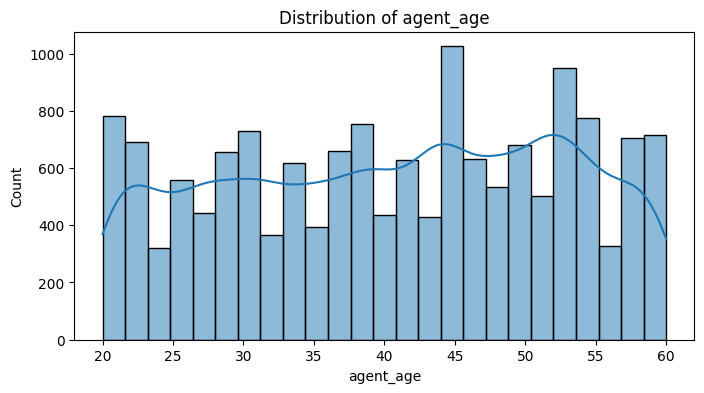

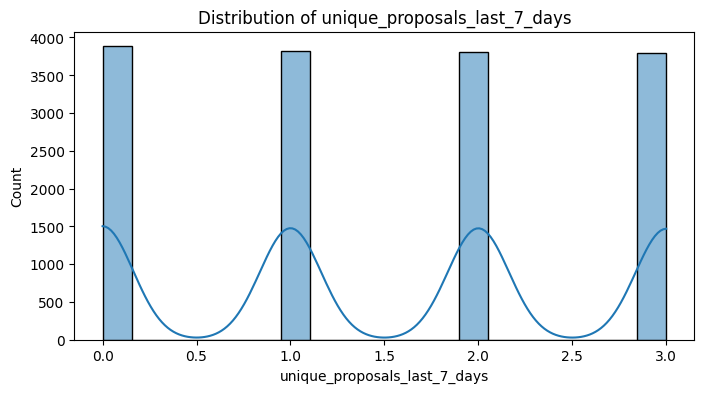

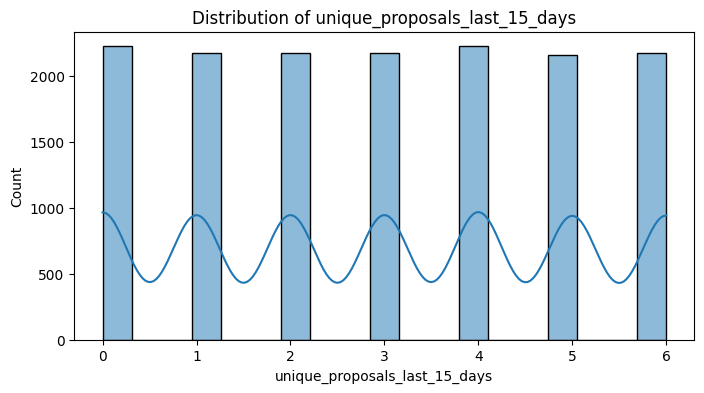

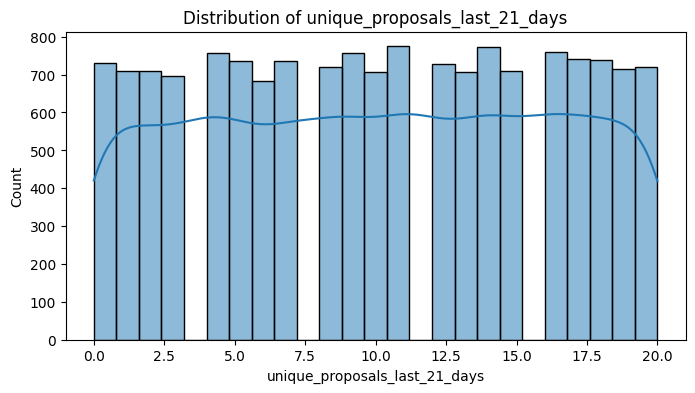

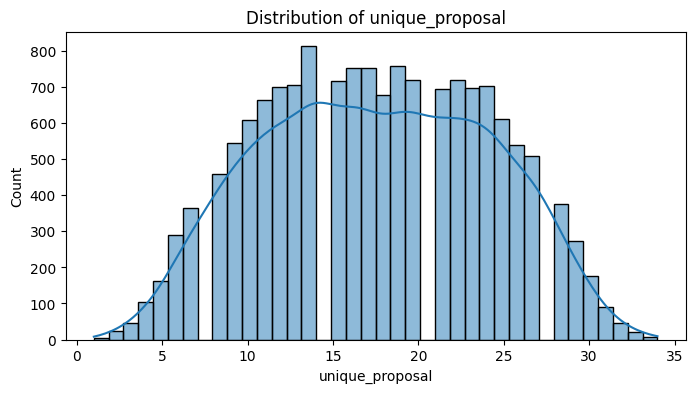

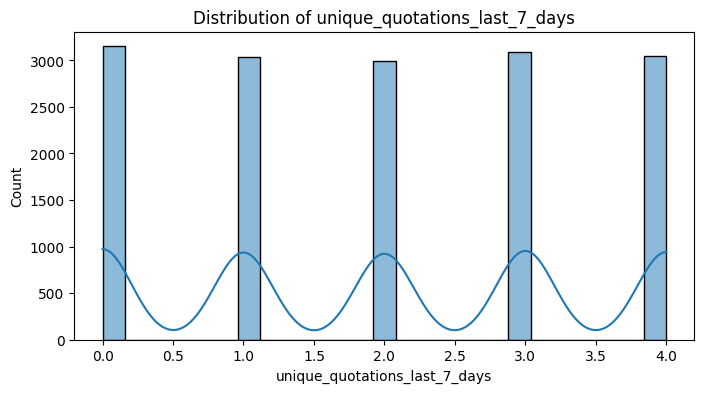

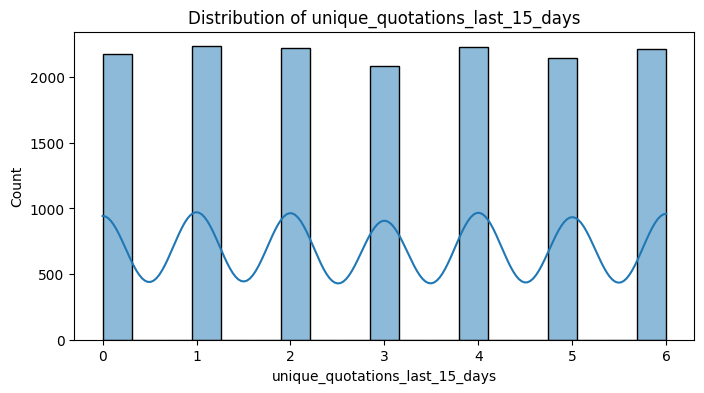

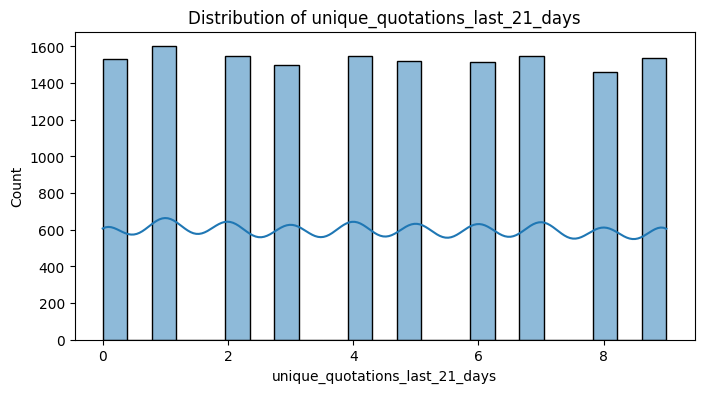

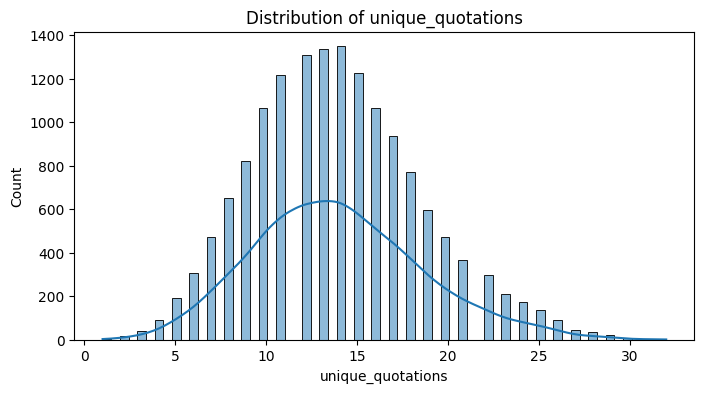

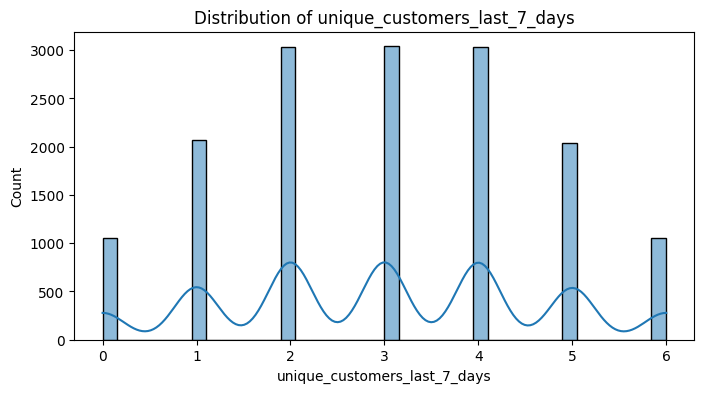

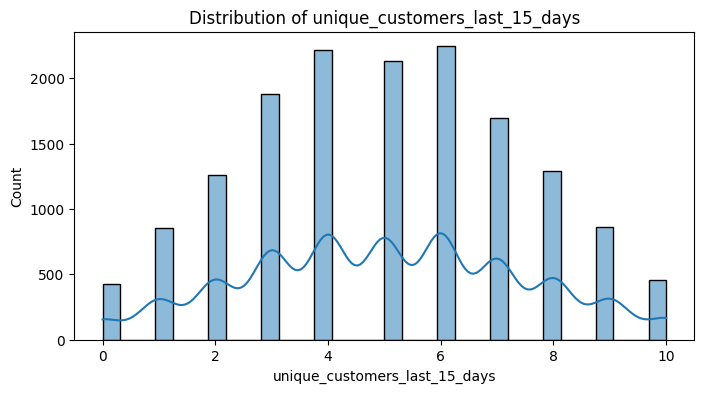

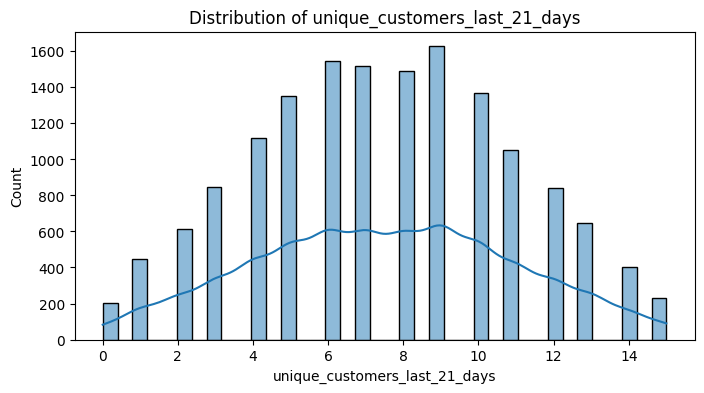

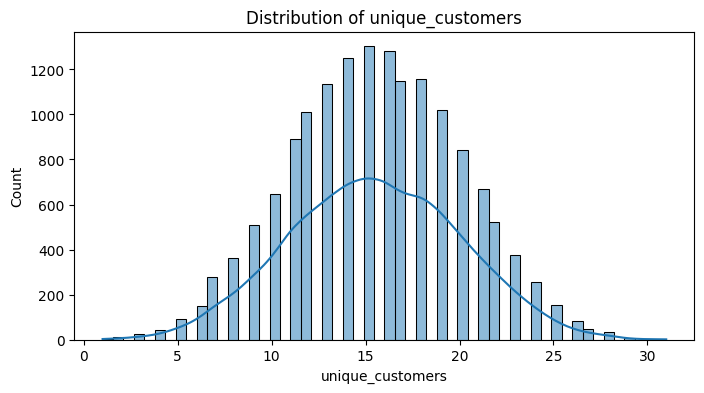

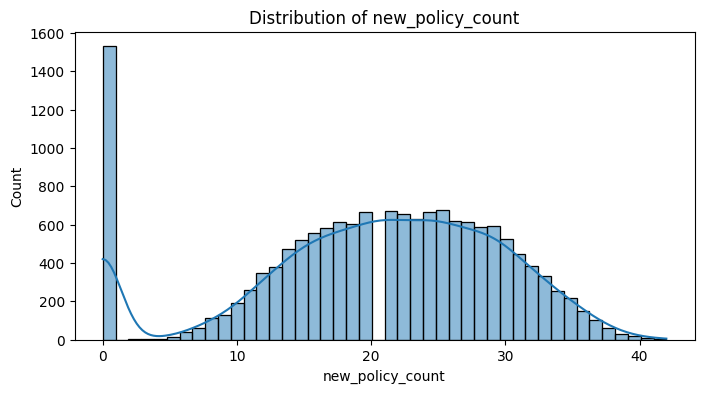

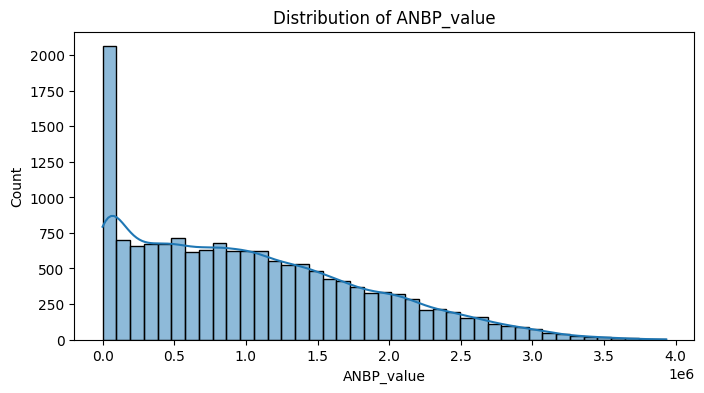

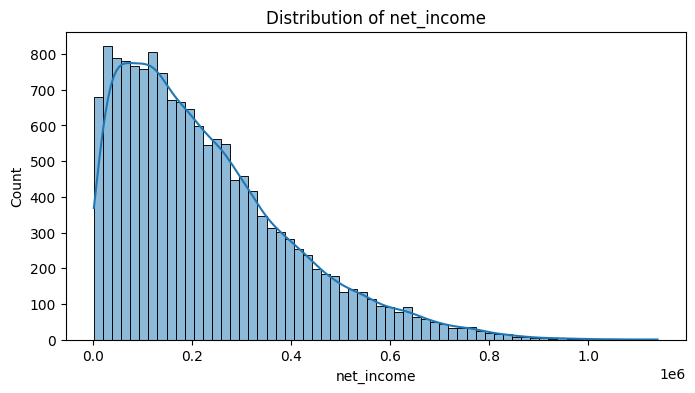

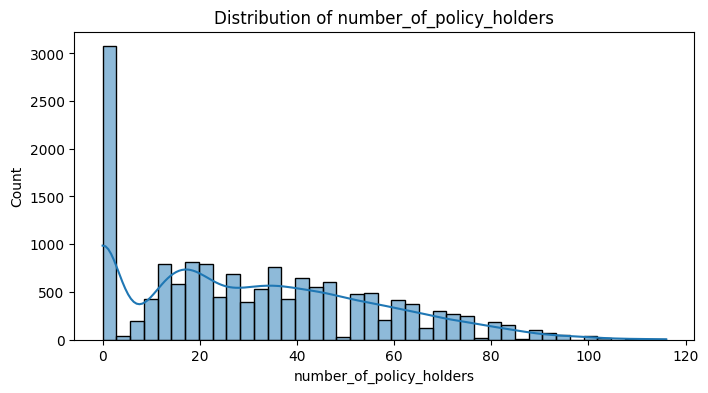

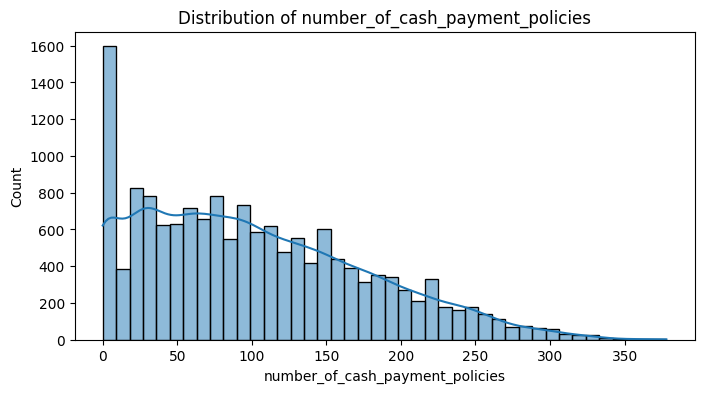

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = [
    'agent_age', 'unique_proposals_last_7_days', 'unique_proposals_last_15_days', 
    'unique_proposals_last_21_days', 'unique_proposal', 'unique_quotations_last_7_days',  
    'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations', 
    'unique_customers_last_7_days', 'unique_customers_last_15_days', 
    'unique_customers_last_21_days', 'unique_customers', 'new_policy_count', 
    'ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies' 
]

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Analysis of Distribution Plots (Histograms and Kernel Density Estimates)

Visualizations complement the summary statistics.

1. Agent Age 
* Bimodal distribution with peaks around 25–30 and 50–55 years.
* A noticeable dip around 40–45.
* The bimodality suggests two dominant age groups of agents—younger (20s–30s) and older (50s–60s)—with fewer agents in their 40s. This aligns with the mean (40.59) and median (41), indicating a balanced overall distribution but with clustering at the extremes.

2. Unique Proposals (7, 15, 21 Days, and Overall)
* Last 7 Days: Discrete distribution with peaks at 0.0, 1.0, 2.0, and 3.0 (~4,000 each). This reflects the integer nature. The KDE shows a multimodal pattern.
* Last 15 Days: Peaks at 0, 1, 2, 3, 4, 5, 6 (~2,000 each), with a similar multimodal KDE, indicating discrete increments (max 6).
* Last 21 Days: Peaks at 0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0 (~700–800 each), with a broader spread (max 20).
* Unique Proposal (Overall): Bell-shaped with a peak around 15–20 (~800), tapering off at 0 and 35. This suggests a normal-like distribution with some right skew.
* Activity increases with time frame, with most agents proposing 0–3 times in 7 days, up to 15–20 in 21 days. The discrete nature reflects capped metrics, while the overall distribution approaches a normal distribution, with a mean of 17.52 and max of 34.

3. Unique Quotations (7, 15, 21 Days, and Overall)
* Last 7 Days: Peaks at 0.0, 1.0, 2.0, 3.0, 4.0 (~3,000 each), with a multimodal KDE (max 4).
* Last 15 Days: Peaks at 0, 1, 2, 3, 4, 5, 6 (~2,000 each), similar to proposals but with a slightly flatter KDE (max 6).
* Last 21 Days: Peaks at 0, 2, 4, 6, 8 (~1,400–1,600 each), with a broader but still discrete distribution (max 9).
* Unique Quotations (Overall): Bell-shaped with a peak around 10–15 (~1,400), tapering off at 0 and 32, showing right skew.
* Quotations follow a pattern similar to proposals, with increasing activity over time. The overall distribution (mean 13.92, max 32) is slightly right-skewed, indicating a few agents generate many quotations.
  
4. Unique Customers (7, 15, 21 Days, and Overall)
* Last 7 Days: Peaks at 0, 1, 2, 3, 4, 5, 6 (~3,000 each), with a multimodal KDE (max 6).
* Last 15 Days: Peaks at 0, 2, 4, 6, 8, 10 (~2,000 each), showing a wider spread (max 10).
* Last 21 Days: Peaks at 0, 2, 4, 6, 8, 10, 12, 14 (~1,600 each), with a broader distribution (max 15).
* Unique Customers (Overall): Bell-shaped with a peak around 10–15 (~1,200), tapering off at 0 and 31, indicating right skew.
* Customer engagement scales with time, with most agents interacting with 0–6 customers in 7 days, up to 10–15 in 21 days. The overall mean (15.49) and max (31) suggest a few agents have significantly higher customer bases.
  
5. New Policy Count
* Bimodal with peaks around 0–10 and 20–30 (~1,600 each), tapering off at 40.
* Ranges from 0 to 42. KDE shows two modes.
* Indicates two groups—agents with low sales (0–10) and moderate-to-high sales (20–30), consistent with the mean (20.27) and max (42). This supports the earlier observation of high variability and potential outliers.

7. ANBP Value 
* Right-skewed with a sharp peak at 0–0.5M (~2,000), declining gradually to 4M.
* KDE shows a long tail.
* The distribution aligns with the mean (~1.03M) and max (~3.93M). This indicates a few agents generate very high annual net billed premiums, consistent with the right-skewed summary stats.
  
8. Net Income 
* Right-skewed with a peak at 0–0.2M (~800), declining to 1M.
* Ranges from 1,160 to ~1.14M, with a long tail.
* Matches the mean (~228K) and max (~1.14M). The plot confirms high variability and a few high earners, as seen in the summary stats.
  
9. Number of Policy Holders
* Right-skewed with a peak at 0–20 (~3,000), declining to 120.
* Ranges from 0 to 116, with a long tail.
* Consistent with the mean (30.97) and max (116), indicating most agents manage fewer policyholders, with some outliers managing many.

11. Number of Cash Payment Policies 
* Right-skewed with a peak at 0–50 (~1,600), declining to 378.
* Ranges from 0 to 378, with a long tail.
* Aligns with the mean (101.18) and max (378). A few agents handle a large number of cash payment policies, supporting the high variability observed.

<br>

**Key Insights** <br>
* Bimodality and Skewness: agent_age and new_policy_count show bimodality, suggesting distinct groups (e.g., young vs. older agents, low vs. high performers).
* Most metrics (ANBP_value, net_income, number_of_policy_holders, number_of_cash_payment_policies) are right-skewed, indicating a few agents outperform the majority, consistent with summary stats.
* Activity Distributions: Proposal, quotation, and customer metrics are discrete and multimodal, reflecting capped values (e.g., max 3 proposals in 7 days). Activity increases with time frame (7 to 21 days), with broader spreads (e.g., 0–20 proposals in 21 days).
* The KDE smooths these discrete distributions, highlighting underlying trends (e.g., peaks at integer values).
* Performance Outliers: High counts at 0 for activity metrics (e.g., ~4,000 at 0 proposals in 7 days) suggest many agents are inactive or low-performing, aligning with the 0 minimum in new_policy_count.
* Long tails in financial and policyholder metrics (e.g., ANBP_value to 4M, number_of_cash_payment_policies to 378) indicate a small group of top performers driving spikes, as seen in November 2023 (16,002 policies).
* Alignment with Summary Stats: The histograms confirm the right-skewed nature of financial and policy-related metrics (means > medians from summary stats). The bimodal new_policy_count supports the variability (std 9.54) and range (0 to 42).

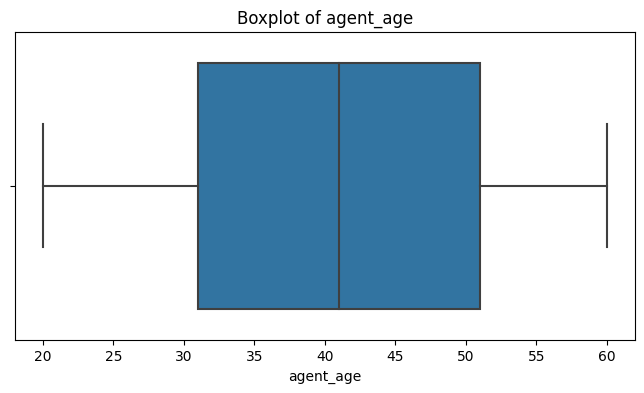

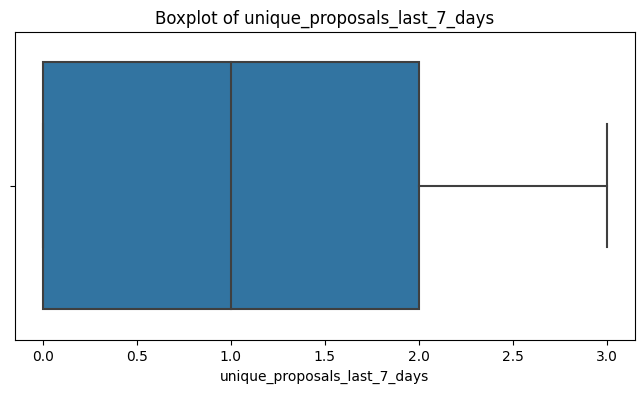

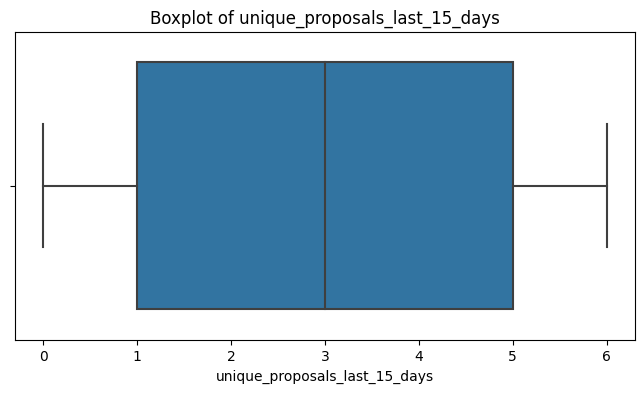

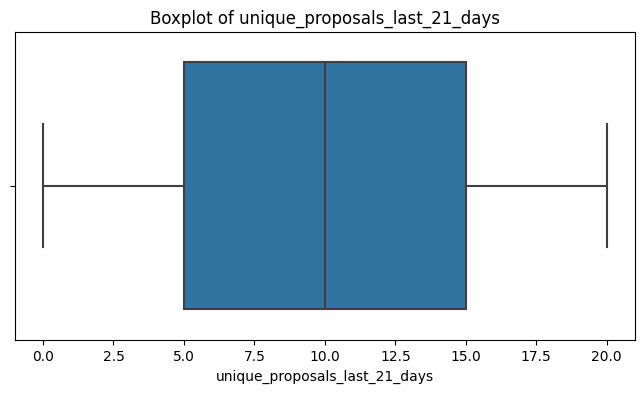

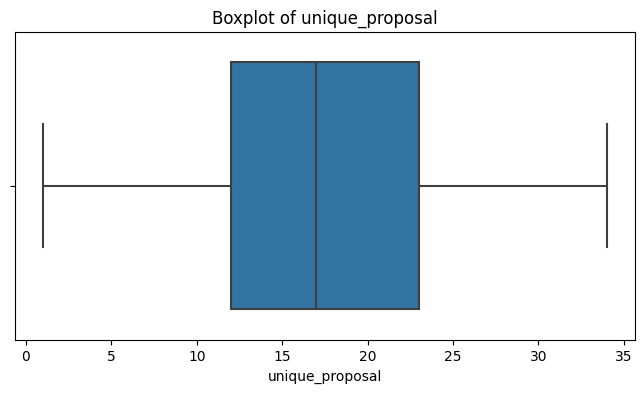

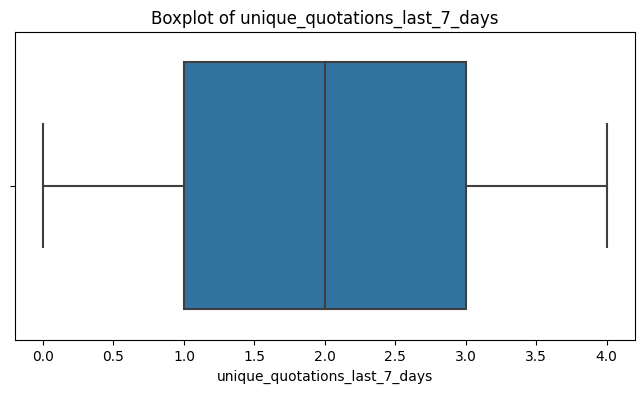

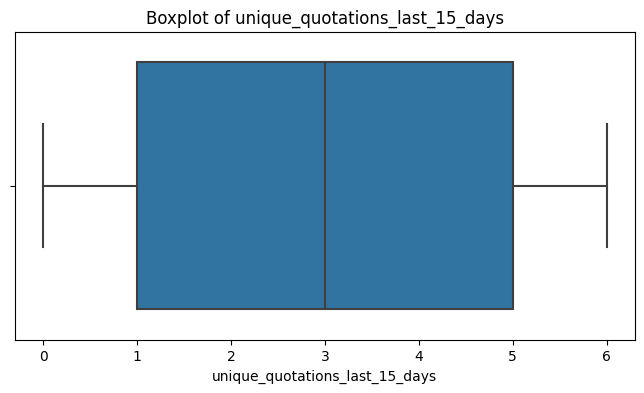

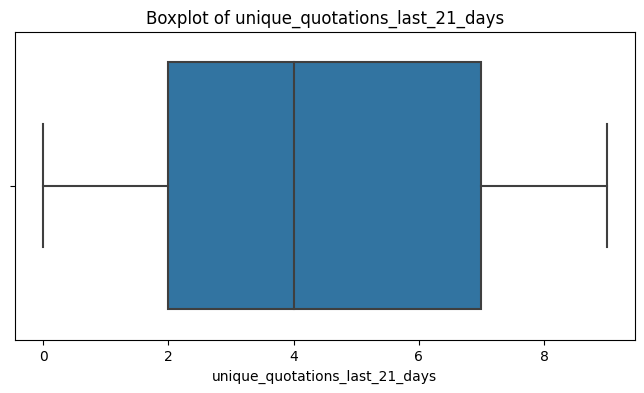

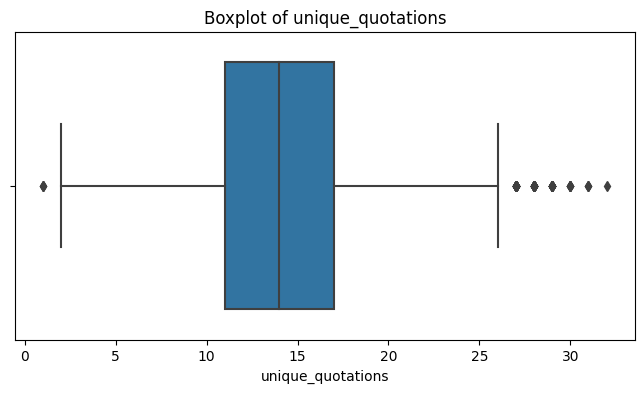

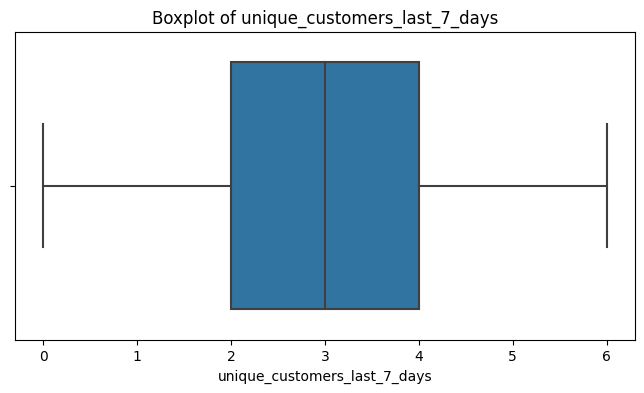

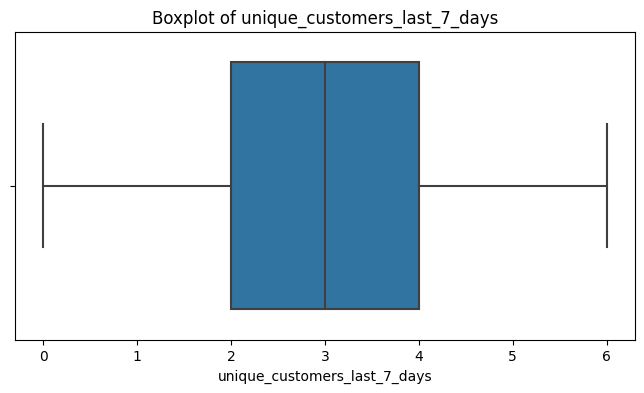

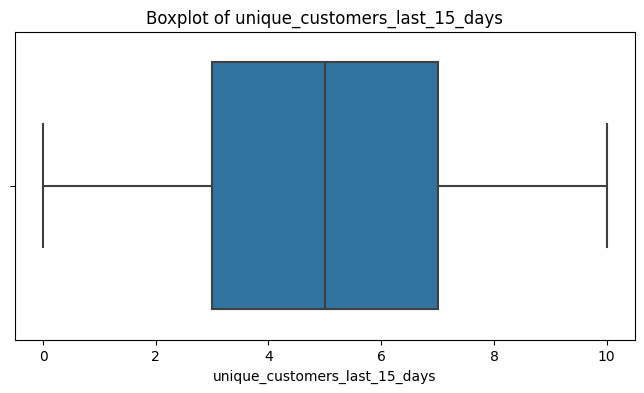

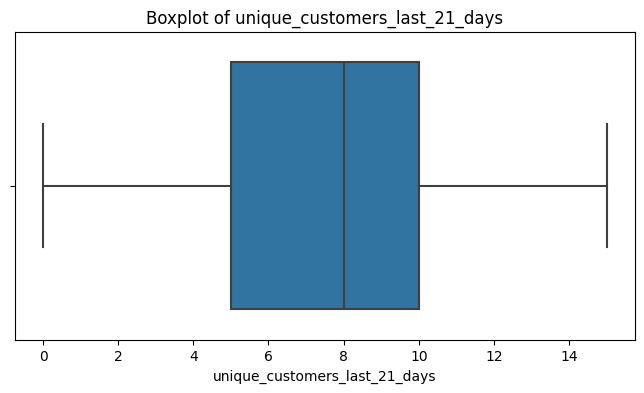

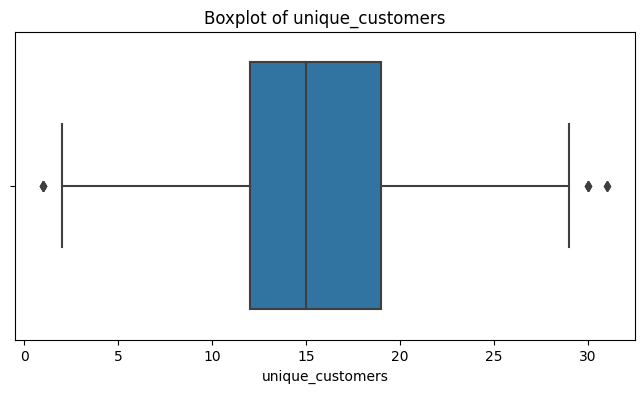

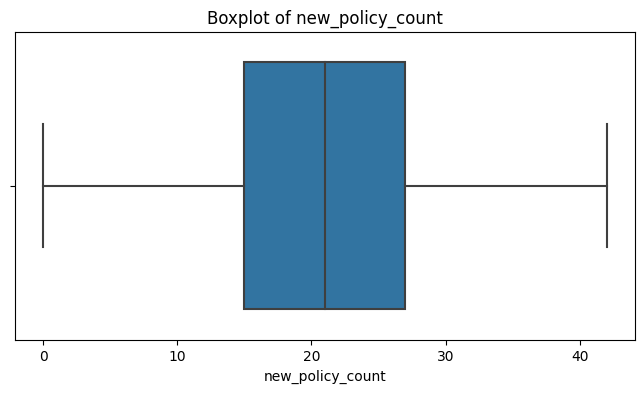

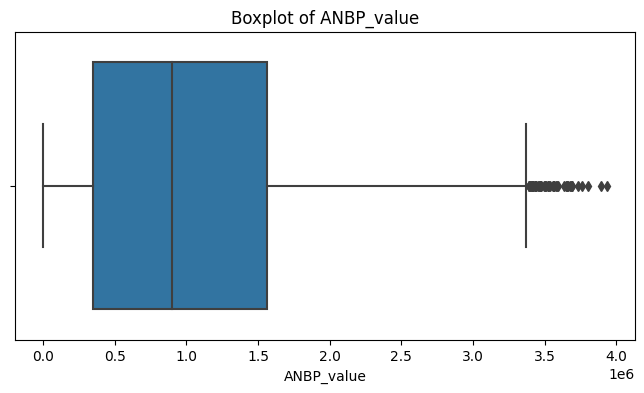

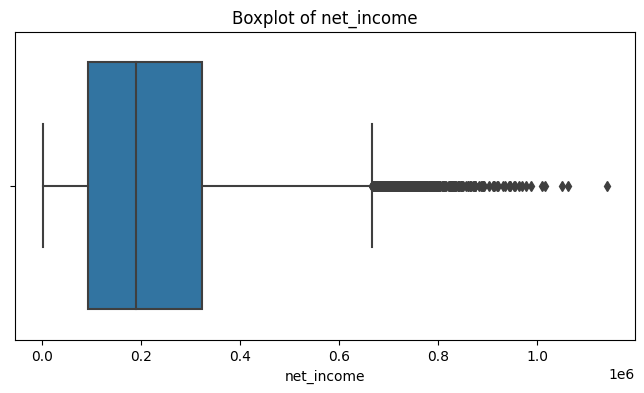

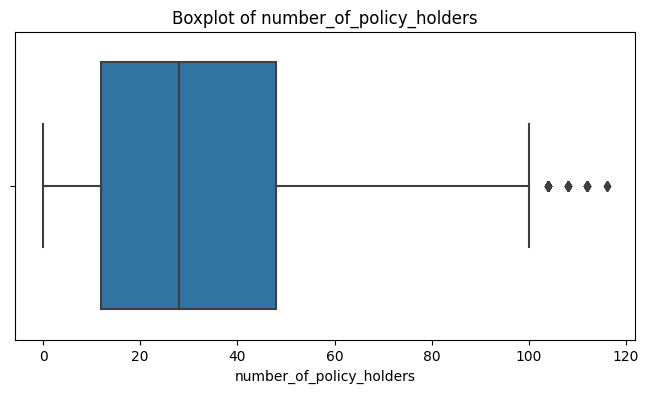

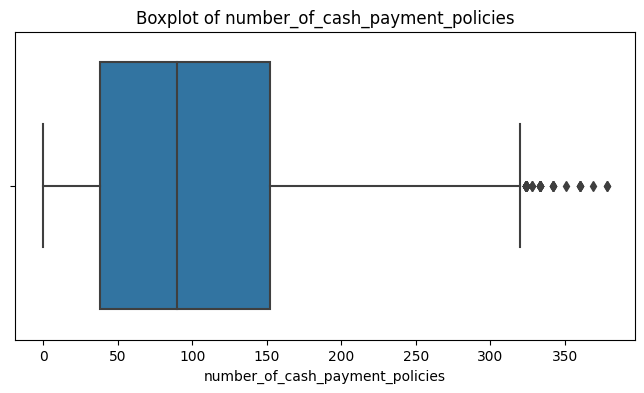

In [11]:
# Boxplot to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Analysis of Box Plots

1. Unique Quotations (Overall)
* A few outliers beyond 30.
* Outliers in the overall data (max 32) suggest a small number of agents generate significantly more quotations, consistent with the right-skewed histogram.

2. Unique Customers (Overall)
* A few outliers beyond 30.
* Outliers in the overall data (max 31) indicate a few agents with unusually high customer bases, aligning with the right-skewed distribution.

3. ANBP Value 
* Several outliers beyond 3M.
* The right-skewed distribution is confirmed by outliers, indicating a few agents generate significantly higher annual net billed premiums.

4. Net Income
* Several outliers beyond 0.8M.
* The right skew is evident with outliers, showing a few agents earn substantially more, consistent with the long tail in the histogram.

5. Number of Policy Holders 
* A few outliers beyond 100.
* The right-skewed distribution (mean 30.97, max 116) shows outliers, indicating a small group of agents manage significantly more policyholders.

6. Number of Cash Payment Policies 
* Several outliers beyond 300.
* The right skew (mean 101.18, max 378) is confirmed by outliers, suggesting a few agents handle a large number of cash payment policies.

**Key Insights** <br>
* No Outliers in Activity Metrics: unique_proposals, unique_quotations (except overall), and unique_customers (except overall) show no outliers. This shows the constrained ranges (e.g. max 3 proposals in 7 days).
* Outliers in Financial and Policy Metrics: ANBP_value, net_income, number_of_policy_holders, and number_of_cash_payment_policies exhibit outliers, indicating a small group of high-performing agents, consistent with right-skewed histograms.
* Agent Age: No outliers, suggesting a uniform age distribution (20–60) with no extreme values.
* New Policy Count: No outliers, indicating most sales fall within a typical range (0–42), aligning with the unimodal, right-skewed distribution.

## Categorical Features

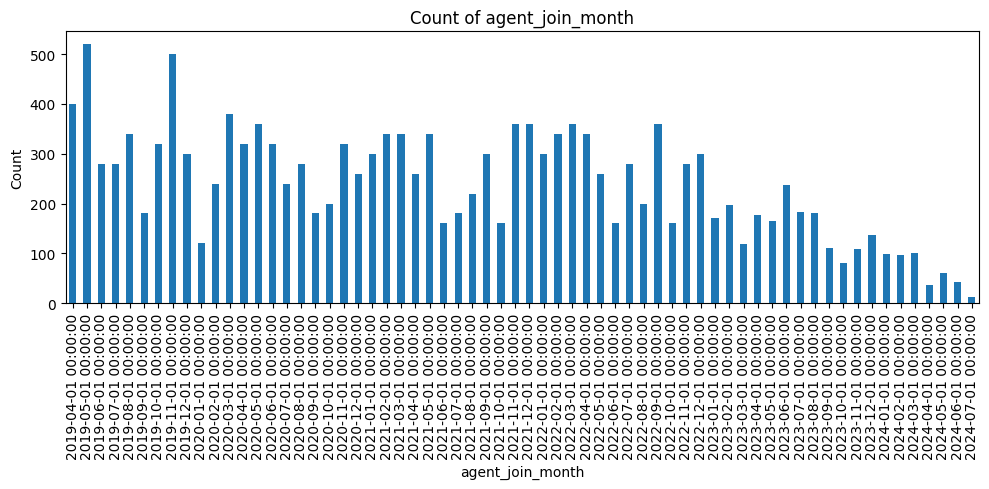

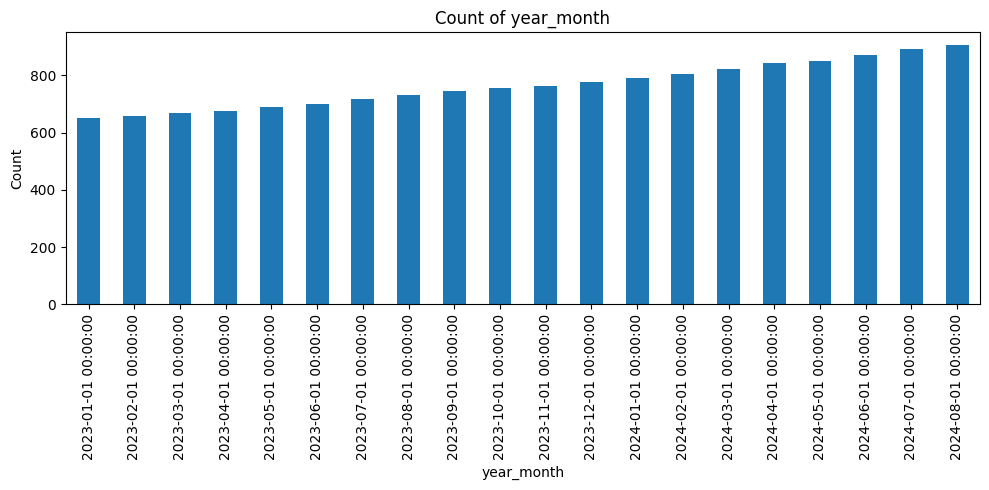

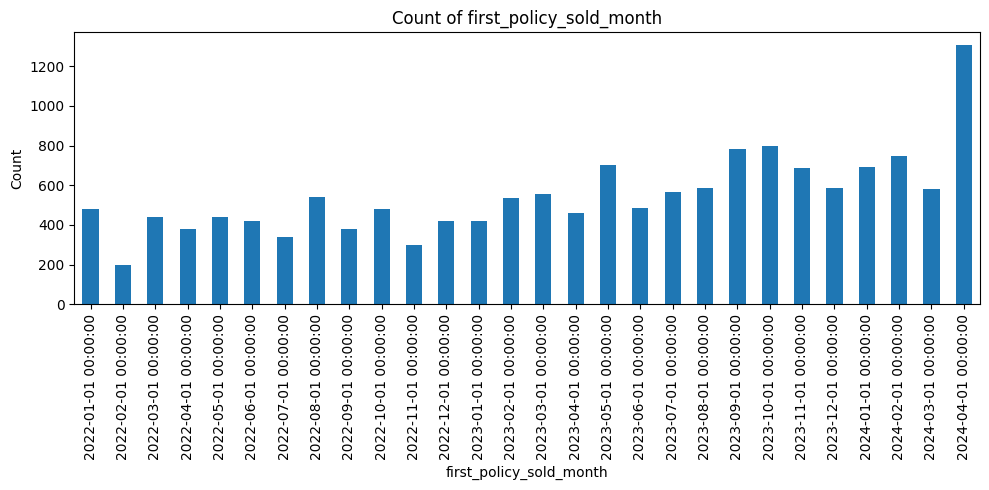

In [16]:
df_copy = df.copy()

categorical_cols = ['agent_join_month', 'year_month', 'first_policy_sold_month']
for col in categorical_cols:
    df_copy[col] = pd.to_datetime(df_copy[col], format='%m/%d/%Y')

    plt.figure(figsize=(10, 5))
    df_copy[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Analysis of the Histograms (Categorical Features)

1. Agent Join Month
* The distribution is right-skewed, with a peak around 2019-05. There are fluctuations, with notable peaks around 2019-05 and 2019-11.
* Most agents joined the company between 2019 and 2022, with a significant drop-off in new joins after 2022. This could indicate a hiring surge in earlier years followed by reduced recruitment, possibly due to market saturation, company strategy shifts, or external factors like economic conditions.
* Newer agents (joined after 2022) are fewer in number, which might mean less historical data to predict their likelihood of becoming "One Month NILL." Older agents may have more established patterns, but their early performance data might be less relevant if conditions have changed.
  
2. Year Month
* The distribution spans from 2023-01 to 2024-08, with counts starting at ~700 in 2023-01 and slightly increasing to ~800 by 2024-08. The trend shows a general upward trajectory.
* The slight increase in counts suggests growing activity over time.
  
3. First Policy Sold Month (first_policy_sold_month)
* The distribution is a little bit left-skewed, starting from 2022-01 with a low count (100), peaking around 2023-10 (800), and then declining sharply toward 2024-03 (200), with a spike at 2024-04 (1200).
*  Most agents sold their first policy between 2022 and 2023, with a significant peak in early 2023. The sharp decline after 2023-04 aligns with fewer agents joining. The spike in 2024-12 is unusual and might indicate a data anomaly or a specific event.
*  Agents who sold their first policy recently (e.g., 2024) might be at higher risk of becoming "One Month NILL" if they struggle to maintain momentum. The time gap between agent_join_month and first_policy_sold_month could be a key feature. Longer delays might correlate with higher NILL risk.

**Overall Insights** <br>
* Temporal Trends: There’s a clear decline in new agent joins and first policy sales over time, but recorded activity (year_month) is slightly increasing. This suggests a shrinking pool of new agents but possibly more activity from existing ones.
* The spike in first_policy_sold_month at 2024-12 warrants investigation—it could be an outlier or a data entry issue.
* The time difference between agent_join_month and first_policy_sold_month could be a useful predictor for "One Month NILL." Additionally, the recency of year_month relative to these dates might influence an agent’s activity level.
* The skewed distributions indicate that earlier periods have more data, which might bias the model toward older trends. Newer agents (post-2023) might need special attention in the model to avoid underrepresentation.

# How do sales patterns vary by month, and are there unexpected drops or spikes performance?

In [17]:
# Group by year_month and sum new_policy_count
df['year_month'] = pd.to_datetime(df['year_month'], format='%m/%d/%Y') 
monthly_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()

monthly_sales

year_month  new_policy_count
0  2023-01-01             12887
1  2023-02-01             13617
2  2023-03-01             13591
3  2023-04-01             13629
4  2023-05-01             14248
5  2023-06-01             14065
6  2023-07-01             14327
7  2023-08-01             14956
8  2023-09-01             14896
9  2023-10-01             15273
10 2023-11-01             16002
11 2023-12-01             15394
12 2024-01-01             15922
13 2024-02-01             15863
14 2024-03-01             16666
15 2024-04-01             17176
16 2024-05-01             17330
17 2024-06-01             17370
18 2024-07-01             18512
19 2024-08-01             18569

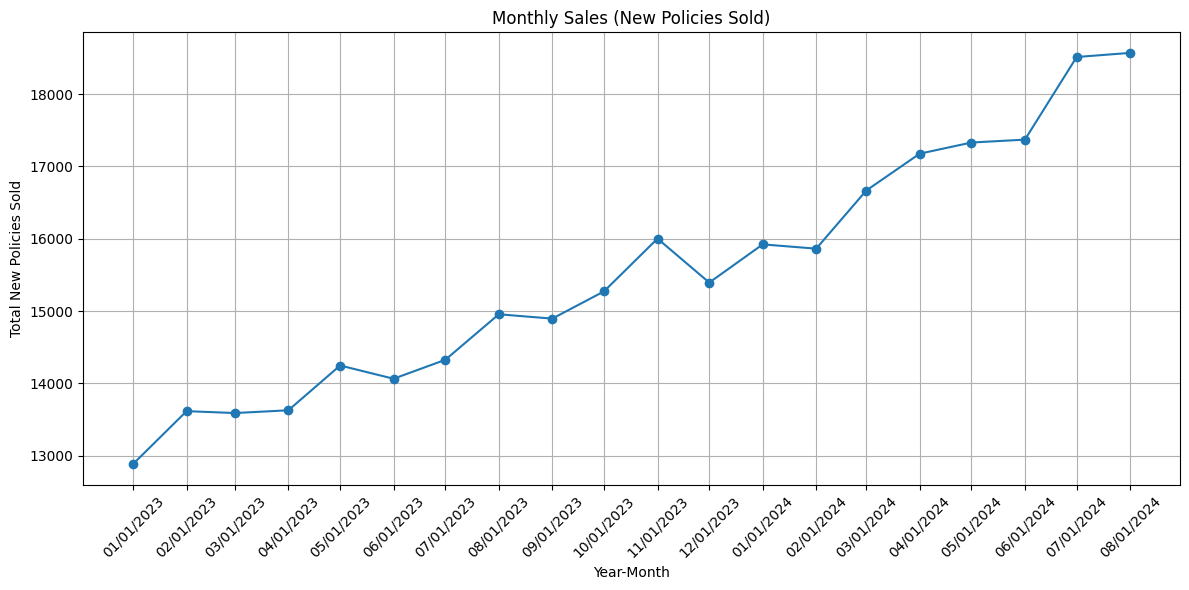

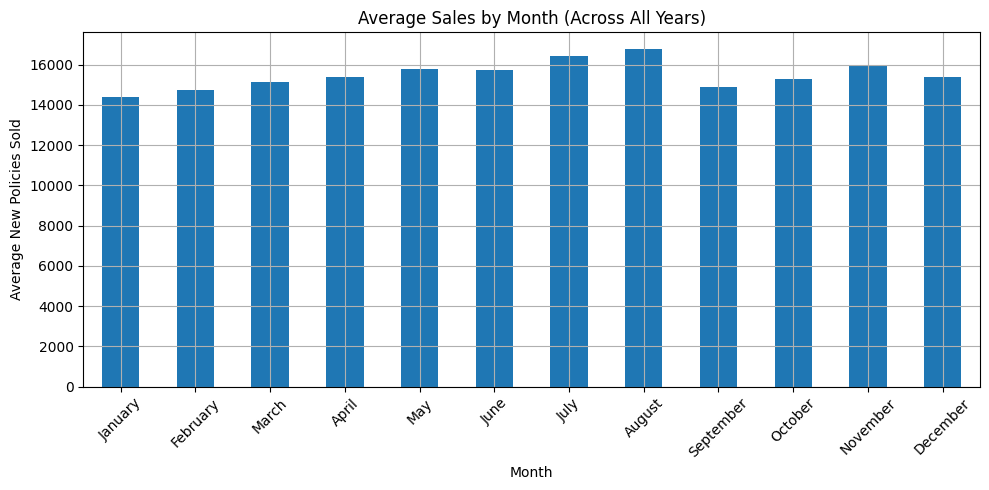

Observation counts per month:
 month
January      2
February     2
March        2
April        2
May          2
June         2
July         2
August       2
September    1
October      1
November     1
December     1
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

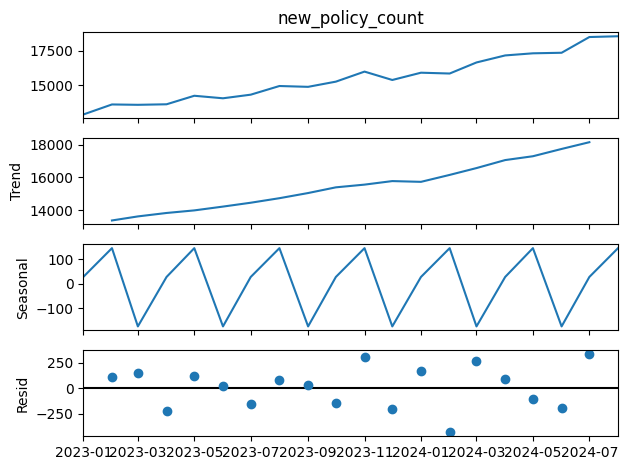

Anomaly Months (Residuals):
year_month
2024-02-01   -432.425926
Name: resid, dtype: float64


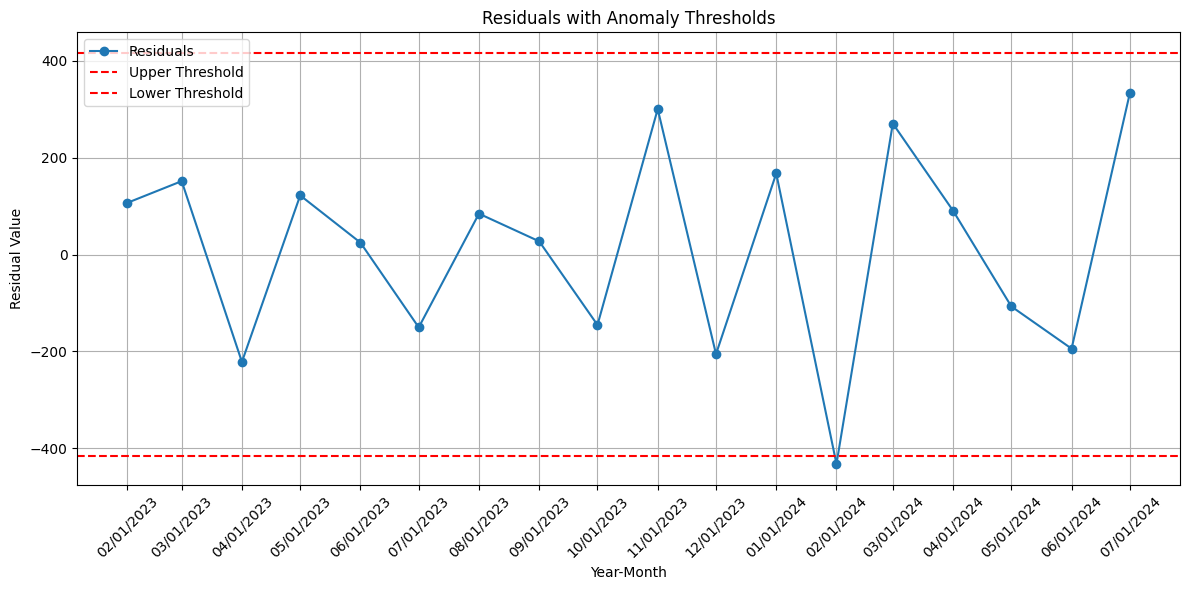

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

#df['year_month'] = pd.to_datetime(df['year_month'], format='%m/%d/%Y') 
monthly_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()
#monthly_sales.set_index('year_month', inplace=True)
#monthly_sales = monthly_sales.sort_index() 
monthly_sales = monthly_sales.set_index('year_month').sort_index()

# Plot Monthly Sales (Chronological) to Visualize Trends and Spikes
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['new_policy_count'], marker='o')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) 
plt.title('Monthly Sales (New Policies Sold)')
plt.xlabel('Year-Month')
plt.ylabel('Total New Policies Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze Sales Patterns by Month (Average Across Years)
monthly_sales['month'] = monthly_sales.index.month_name()

# Compute average sales by month
month_avg_sales = monthly_sales.groupby('month')['new_policy_count'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot average sales by month
plt.figure(figsize=(10, 5))
month_avg_sales.plot(kind='bar')
plt.title('Average Sales by Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Average New Policies Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Observation counts per month:\n", monthly_sales['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]))

# Detect Unexpected Spikes/Drops Using Decomposition
# Perform decomposition with period=3 (quarterly, since period=6 was noisy in prior attempts)
decomposition = seasonal_decompose(monthly_sales['new_policy_count'], model='additive', period=3)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Identify anomalies using residuals
residuals = decomposition.resid
threshold = 2 * residuals.std()
anomalies = residuals[abs(residuals) > threshold]
print("Anomaly Months (Residuals):")
print(anomalies)

plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, marker='o', label='Residuals')
plt.axhline(y=threshold, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--', label='Lower Threshold')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.title('Residuals with Anomaly Thresholds')
plt.xlabel('Year-Month')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The New Policies Sold over Time graph shows a general increment in sales. It also shows some unexpected drops and spikes:
* A slight spike at 2023-04-01
* A slight drop at 2023-05-01
* A slight drop at 2023-10-01
* A sudden spike at 2024-06-01

But it should be noted that since this is a time series, there can be trends and seasonal patterns. We have to account for them when we investigate the drops and spikes.

In the above, some months are under-represented, especially the last four. The 'Observation Counts per Month' shows how many times it has appeared. The lower 4 have only 1 count (only 2023).  This is important when computing averages or detecting anomalies (low counts reduce reliability).

The time series was broken into following:

* Trend: The long-term progression.
* Seasonal: Repeating patterns (like monthly).
* Residual: What's left (unexpected).

There was only one anomaly: 2024-02-01 <br>

This means that February 2024 had a lower-than-expected sales count, even after accounting for trends and seasonal patterns. The sales were off by ~432 policies. <br>

Actual numbers:
* Feb 2023: 13,617
* Feb 2024: 15,863 — This is actually higher, but may be the model expected a bigger jump based on previous months’ trend.

# Multivariate Analysis

## Correlation

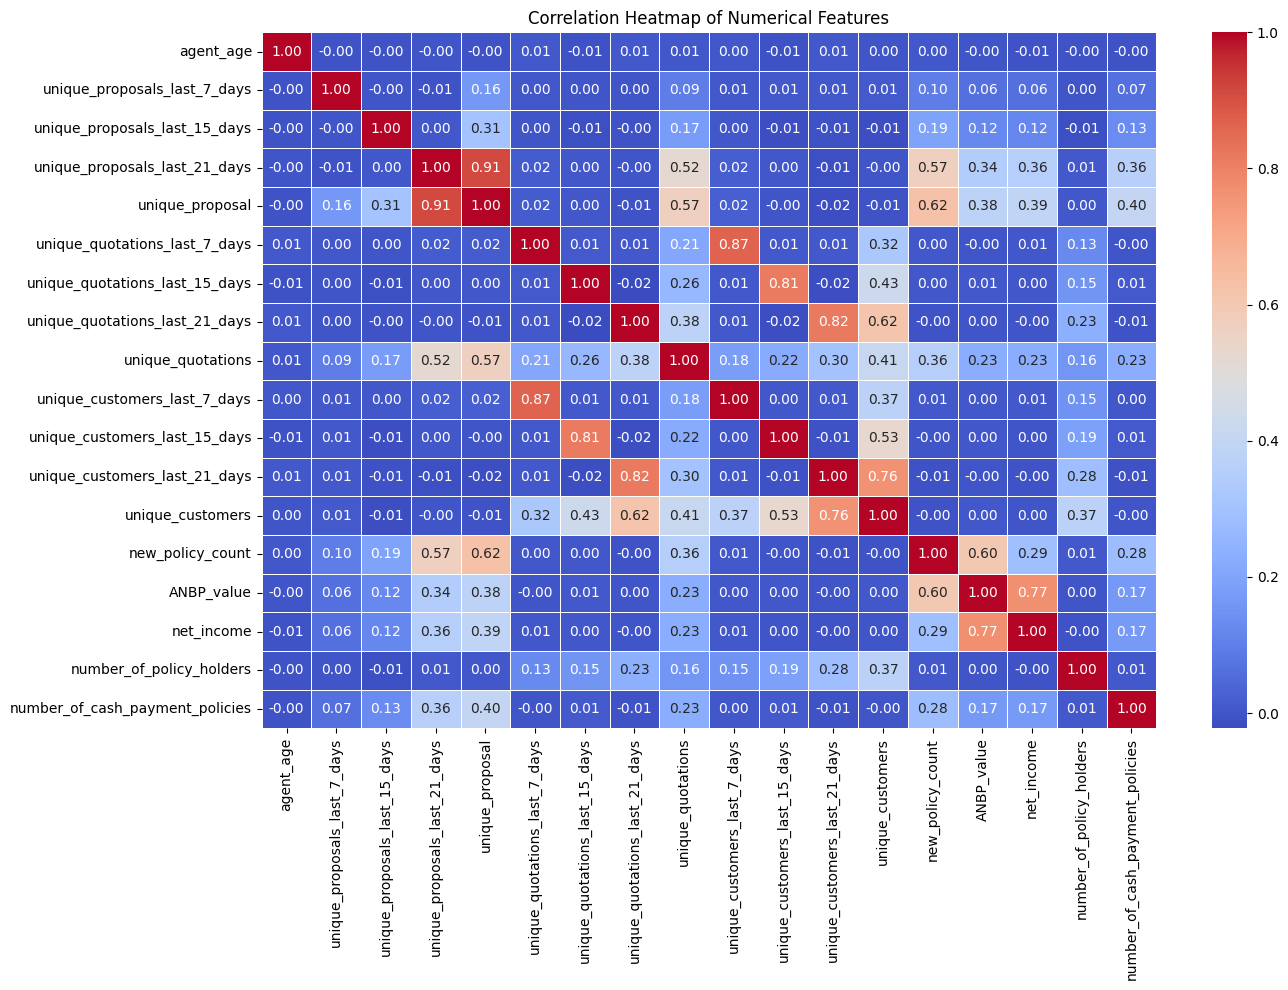

In [21]:
numerical_df = df[numerical_cols]

# Correlation matrix
corr = numerical_df.corr()

# heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### Correlation Heat Map Analysis

Strong Positive Correlations:
* New Policy Count with ANBP Value and unique proposals has strong positive correlations. Agents who generate more proposals are more likely to sell policies, which in turn boosts their premium revenue. This indicates proposal activity as a key driver of sales success. Low proposal activity in the following month could be an early indicator of "One Month NILL" agents, making unique_proposals a critical feature for prediction.
* Net Income has a strong positive correlation with ANBP Value. Higher premiums directly contribute to higher net income, reflecting a direct financial benefit from successful sales. This reinforces the link between sales performance and profitability. Agents with declining ANBP_value in the next month may be at risk of lower net_income, signaling NILL status if income drops to zero.
* Unique customers has strong positive correlations with unique quotations (last 21 days), and unique customers(last 15 days, last 21 days). Higher customer engagement is strongly associated with generating more quotations over longer time frames (15 and 21 days). A drop in unique_customers or unique_quotations in the following month could indicate reduced engagement, increasing the likelihood of an agent becoming "One Month NILL."
* Unique customers (last 21 days) has a strong positive correlation with Unique quotations (last 21 days). Consistent customer contact over a 21-day period strongly drives quotation generation over the same period. Monitoring 21-day customer and quotation trends could help identify agents at risk if these metrics decline sharply.
* Unique customers (last 15 days) has strong positive correlations with Unique quotations (last 15 days) and unique customers. A 15-day window shows a strong relationship between customer contact and quotations, with overall customer engagement reinforcing this trend. This 15-day metric could be a short-term predictor of NILL risk, especially if activity drops off after an initial burst.
* Unique customers (last 7 days) has a strong positive correlation with Unique quotations (last 7 days). Immediate customer contact within 7 days strongly correlates with immediate quotation activity, suggesting quick follow-ups are effective. A sudden decrease in 7-day activity could be an early warning sign for NILL status, warranting immediate intervention.
* Unique quotations has strong correlations with unique proposals (last 21 days), and unique proposals (overall). Quotations are closely tied to proposal activity, especially over 21 days and overall. A decline in proposal activity (especially over 21 days) could reduce quotations, increasing NILL risk.
* Unique proposals has strong correlation with unique proposals (last 21 days). Overall proposal activity is heavily influenced by the 21-day window, suggesting this is a key period for proposal generation. Tracking 21-day proposal trends could help predict sustained activity levels and identify agents at risk of inactivity.


**Overall EDA Insights** <br>
* The strong correlations form a clear pipeline from customer engagement (unique_customers) to proposals (unique_proposals) to quotations (unique_quotations) and finally to policy sales (new_policy_count), which drives financial outcomes (ANBP_value and net_income). This pipeline is consistent across different time frames (7, 15, 21 days), with 21-day metrics showing the strongest relationships.
* Features like unique_proposals_last_21_days, unique_customers_last_21_days, and unique_quotations_last_21_days are critical for predicting "One Month NILL" due to their strong links to sales outcomes. A drop in these metrics in the following month could signal inactivity.
* The high correlations within time frames (e.g. unique_customers_last_15_days with unique_customers) and across related metrics (e.g. unique_proposals with unique_quotations) suggest potential redundancy. Aggregating these into total metrics (e.g., total customers or total proposals) could simplify the model without losing predictive power.
* The 7-day correlations highlight the importance of immediate action, while 21-day correlations suggest a longer-term trend to monitor for sustained performance.

**Suggestions** <br>
* Create aggregated features (e.g. total proposals = sum of 7, 15, 21-day proposals) to reduce multicollinearity and improve model efficiency.
* Use 7-day metrics for real-time monitoring and 21-day metrics for trend analysis to identify at-risk agents early.
* Cross-reference the 2024-12 spike in first_policy_sold_month with these metrics to ensure it’s not skewing correlations or predictions.
* Prioritize unique_proposals, unique_customers, and unique_quotations as predictors, alongside new_policy_count and financial metrics, to build a robust "One Month NILL" prediction model.

## Pairplots

* Too many variables can clutter a pairplot. Therefore a few key ones were chosen:

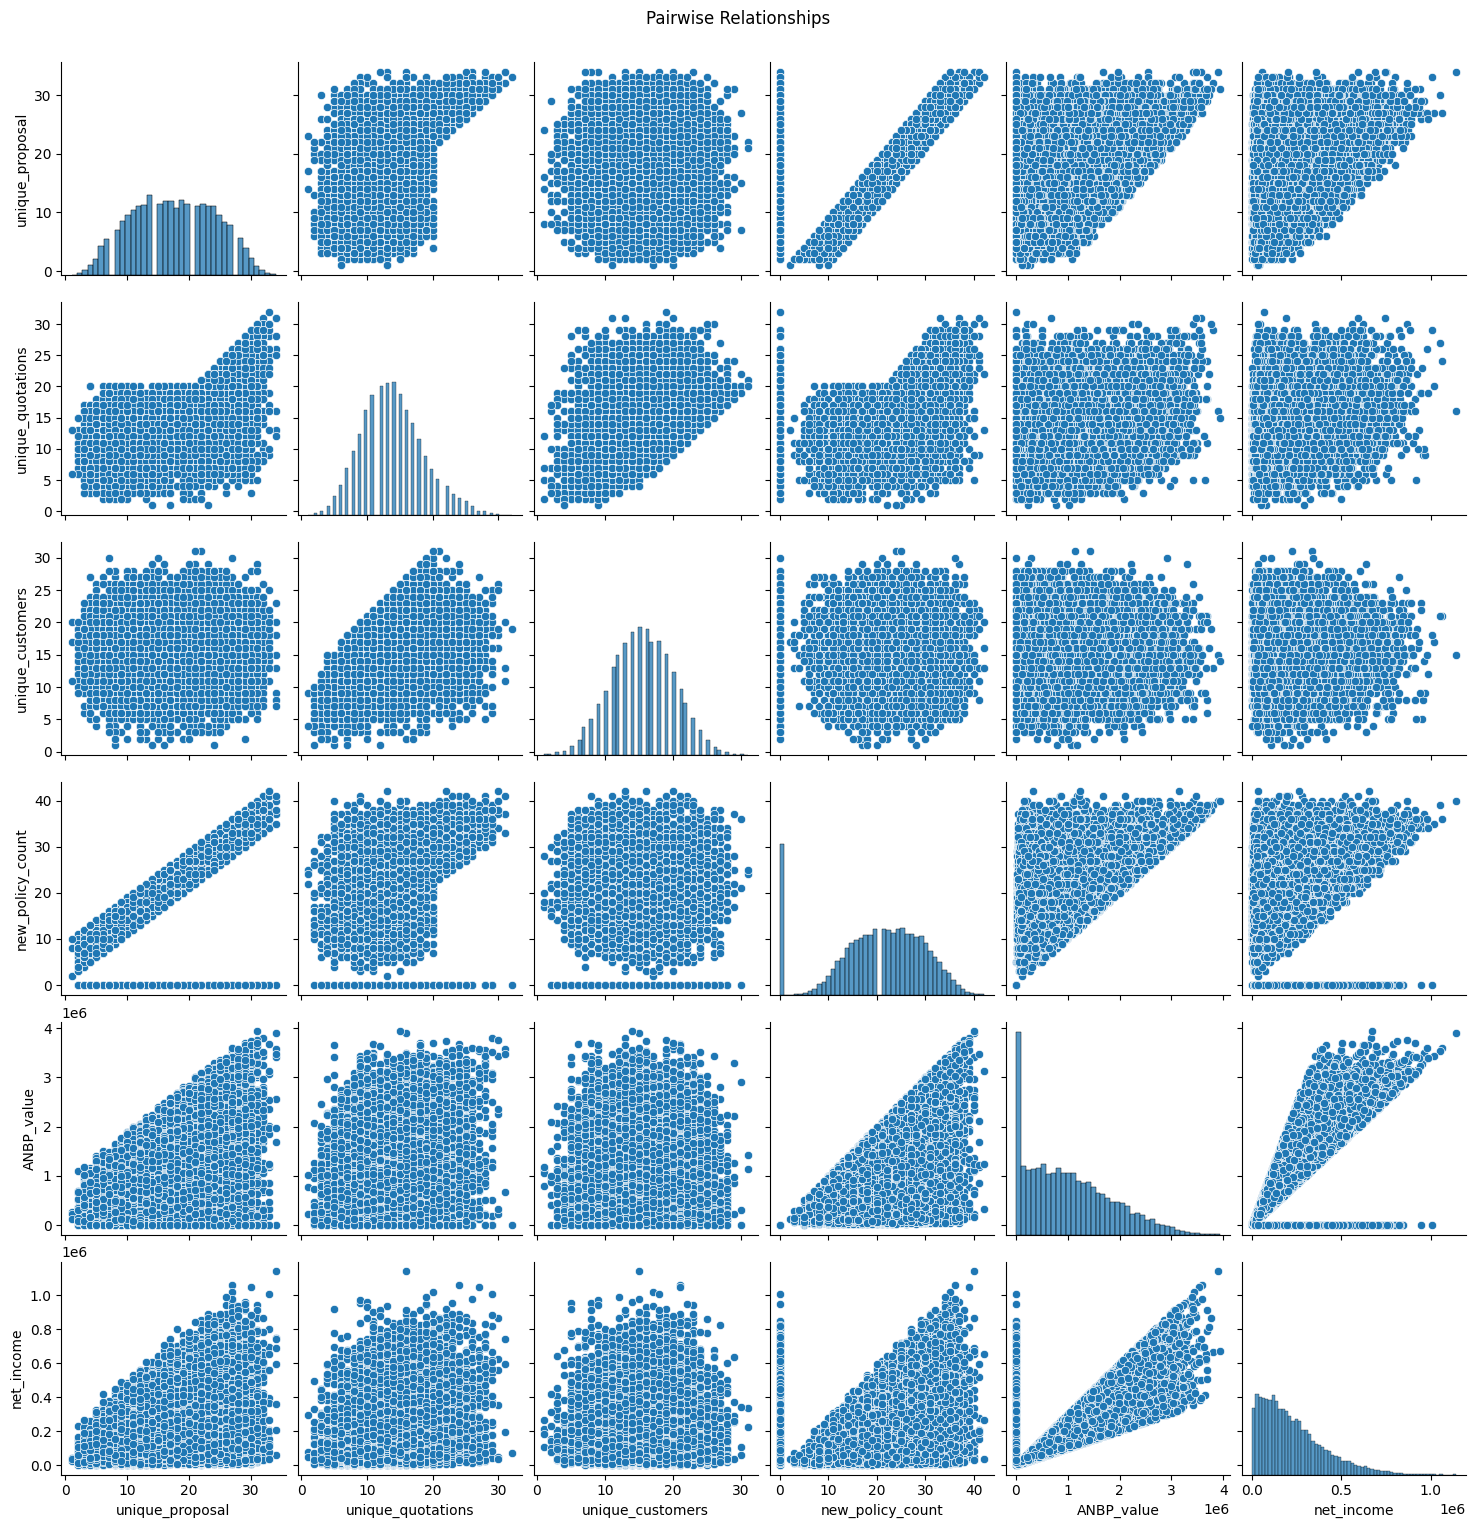

In [25]:
selected = ['unique_proposal', 'unique_quotations', 'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income']

sns.pairplot(df[selected])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.savefig('pairplots.png', dpi=300, bbox_inches='tight')
plt.show()

### Analysis on pairplots

**Marginal Distributions (Diagonals)**
* Unique Proposal, Unique Quotations, Unique Customers, New Policy Count: These variables have slightly normal distributions. 
* ANBP Value and Net Income: Both are extremely right-skewed, with most values clustered near 0 and long tails extending to higher values. This reflects that most agents have low premiums and income, with a few generating significant revenue.


**Pairwise Relationships (Scatter Plots)** <br>

1. Unique Proposal vs. Unique Quotations:
* A strong positive linear trend is visible, with a dense cluster along the diagonal from (0,0) to (30, 30). This confirms the strong correlation (~0.91 with unique_proposals_last_21_days and overall), indicating that higher proposal activity leads to more quotations.
* Agents with low proposal counts are likely to generate few quotations, increasing NILL risk.

2. Unique Customers vs. Unique Quotations:
* A positive relationship is evident, with a broad scatter from (0,0) to (30, 30). The correlation with unique_quotations_last_21_days (~0.76).

3. New Policy Count vs. ANBP Value and Net Income
* Strong positive trends are visible, with new_policy_count increasing alongside ANBP_value (correlation ~0.34) and net_income (correlation ~0.36). The scatter widens at higher values, suggesting variability in premium and income per policy.

4. Unique Proposal/Quotations/Customers vs. New Policy Count:
Positive trends are present, though less pronounced than financial correlations. Higher values of unique_proposal, unique_quotations, and unique_customers are associated with more new_policy_count, aligning with the activity pipeline.

5. ANBP Value vs. Net Income:
A strong positive relationship is evident, with a tight cluster at low values and a spread at higher values. This reflects that higher premiums generally lead to higher income, though with some variability.

**Overall Insights** <br>

* Skewness and Outliers: The right-skewed distributions and long tails suggest the presence of high-performing agents.
* The positive trends from unique_customers to unique_proposals to unique_quotations to new_policy_count confirm the activity pipeline, with financial metrics (ANBP_value, net_income) as downstream outcomes. This supports using these as predictors for "One Month NILL."
* Cluster Analysis: The dense clusters near (0,0) across many pairs indicate a large group of low-activity agents, potentially at higher NILL risk. The spread at higher values suggests variability in performance.
* The concentration of zero or low values in new_policy_count and financial metrics highlights a potential imbalance, which might require oversampling or stratification in modeling.

## PCA

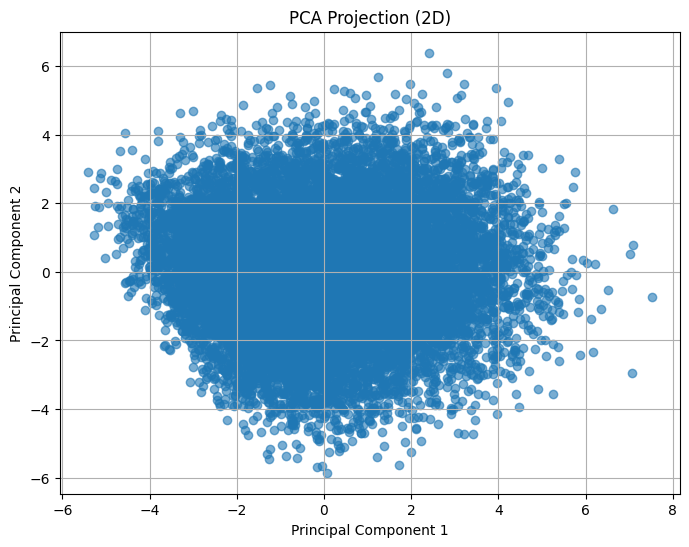

Explained variance ratio: [0.2097032  0.17021253]


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
X_scaled = StandardScaler().fit_transform(numerical_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Variance explained
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

### Analysis (PCA)

* **Explained Variance Ratio:** The explained variance ratios are [0.20970932, 0.17021253]. PC1 accounts for approximately 20.97% of the total variance, and PC2 accounts for about 17.02%. Together, these two components explain about 38% of the variance in the original data.

* The scatter plot shows a dense central cluster of points centered around (0, 0) on both PC1 and PC2. It has a spread extending to approximately ±6 on PC1 and ±4 on PC2. The points are roughly circularly distributed. Although there are some outliers in the positive PC1 and PC2 directions.
* The distribution appears to lack distinct clusters or clear separation. The points form a single, generally elliptical cloud. This suggests that the agents are not strongly grouped into separate categories based on the two components.
* There are a few scattered points at the extremes (e.g. PC1 > 6 and PC2 > 4), which could represent high-performing agents or outliers.
<br>
* With only 38% of the variance explained by the first two components, a significant portion of the variability in the data (62%) is captured by higher-order components. This indicates that two dimensions may not be sufficient to fully represent the dataset’s structure. This is possibly due to the complexity of the relationships among features like unique_proposal, unique_quotations, unique_customers, new_policy_count, ANBP_value, and net_income.
* The lack of distinct clusters suggests that the agents are relatively homogeneous in terms of the linear combinations of features captured by PC1 and PC2. This could mean that the strong correlations are not translating into clear separations in this 2D projection.
<br>
* The outliers in the positive PC1 and PC2 regions likely correspond to agents with high values in features like ANBP_value or net_income (since their right-skewed distributions). These could be top performers or data entry errors.

# How do individual agent trajectories evolve over time? 

* Since it is not practical to plot graphs for each individual agent, the graphs relevant to the worst agent, the best agent, and the average agent are plotted below. <br>
* Note that we have considered an agent a worst or best agent if the agent has records in every month. If not, the new agents (without the records of all 20 months) will also be considered for the worst agents, which is not ideal.
* Given below are the trajectories of the agents with different aspects

## New Policies Over Time

In [31]:
df['year_month'] = pd.to_datetime(df['year_month'], format='%m/%d/%Y')
df = df.sort_values(['agent_code', 'year_month'])

avg_agent_trend = df.groupby('year_month')['new_policy_count'].mean().reset_index()
avg_agent_trend.rename(columns={'new_policy_count': 'avg_new_policies'}, inplace=True)

# Filter agents with enough data points 
agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['new_policy_count'].sum()

best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 3c7a8b50
Worst agent: 974da954


In [33]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'new_policy_count']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'new_policy_count']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'new_policy_count': 'best_agent_policies',
    'new_policy_count_worst': 'worst_agent_policies'
}, inplace=True)

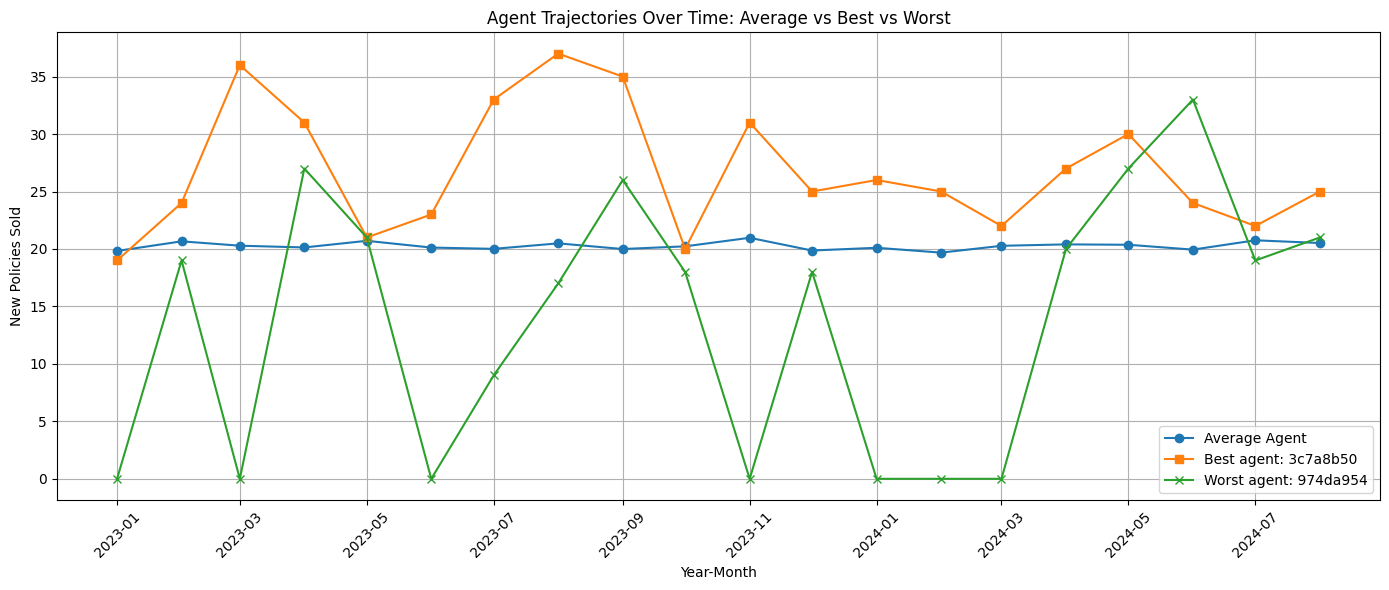

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_new_policies'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_policies'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_policies'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('New Policies Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ANBP_value Over Time

In [35]:
avg_agent_trend = df.groupby('year_month')['ANBP_value'].mean().reset_index()
avg_agent_trend.rename(columns={'ANBP_value': 'avg_ANBP_value'}, inplace=True)

# Filter agents with enough data points 
agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['ANBP_value'].sum()

best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 4b50ba06
Worst agent: 45910031


In [36]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'ANBP_value']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'ANBP_value']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'ANBP_value': 'best_agent_ANBP_value',
    'ANBP_value_worst': 'worst_agent_ANBP_value'
}, inplace=True)

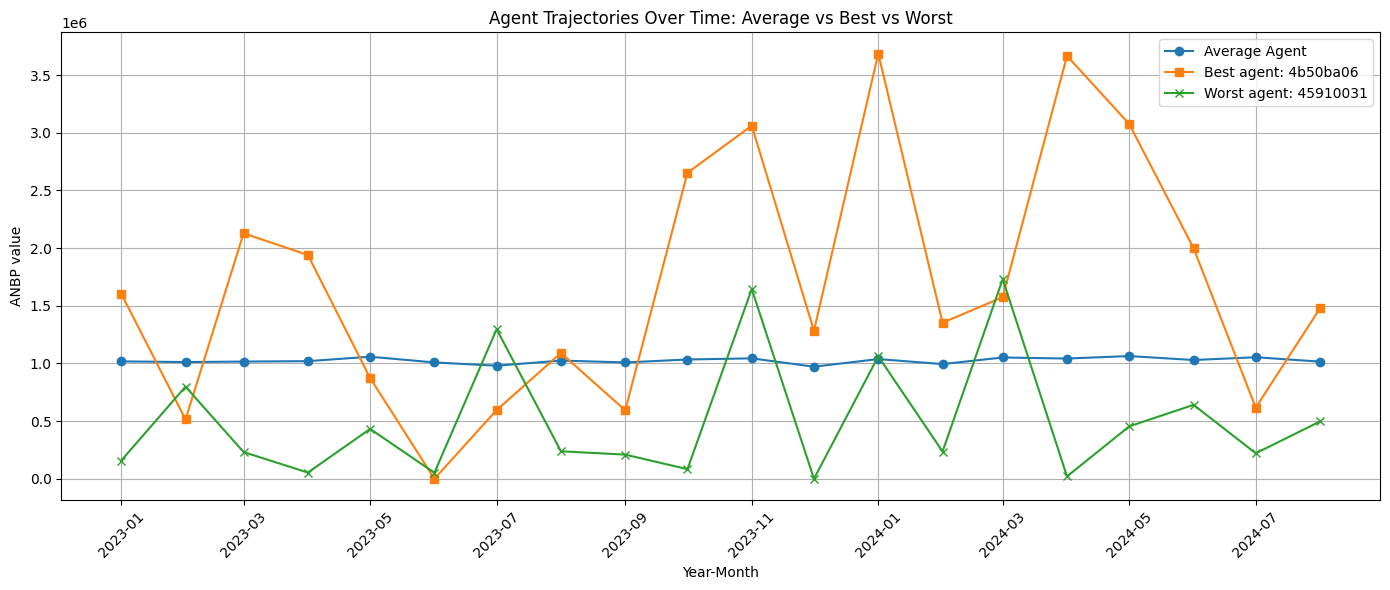

In [37]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_ANBP_value'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_ANBP_value'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_ANBP_value'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('ANBP value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Net Income Over Time

In [38]:
avg_agent_trend = df.groupby('year_month')['net_income'].mean().reset_index()
avg_agent_trend.rename(columns={'net_income': 'avg_net_income'}, inplace=True)

# Filter agents with enough data points 
agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['net_income'].sum()
best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 2e3d2e76
Worst agent: 45910031


In [39]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'net_income']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'net_income']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'net_income': 'best_agent_net_income',
    'net_income_worst': 'worst_agent_net_income'
}, inplace=True)

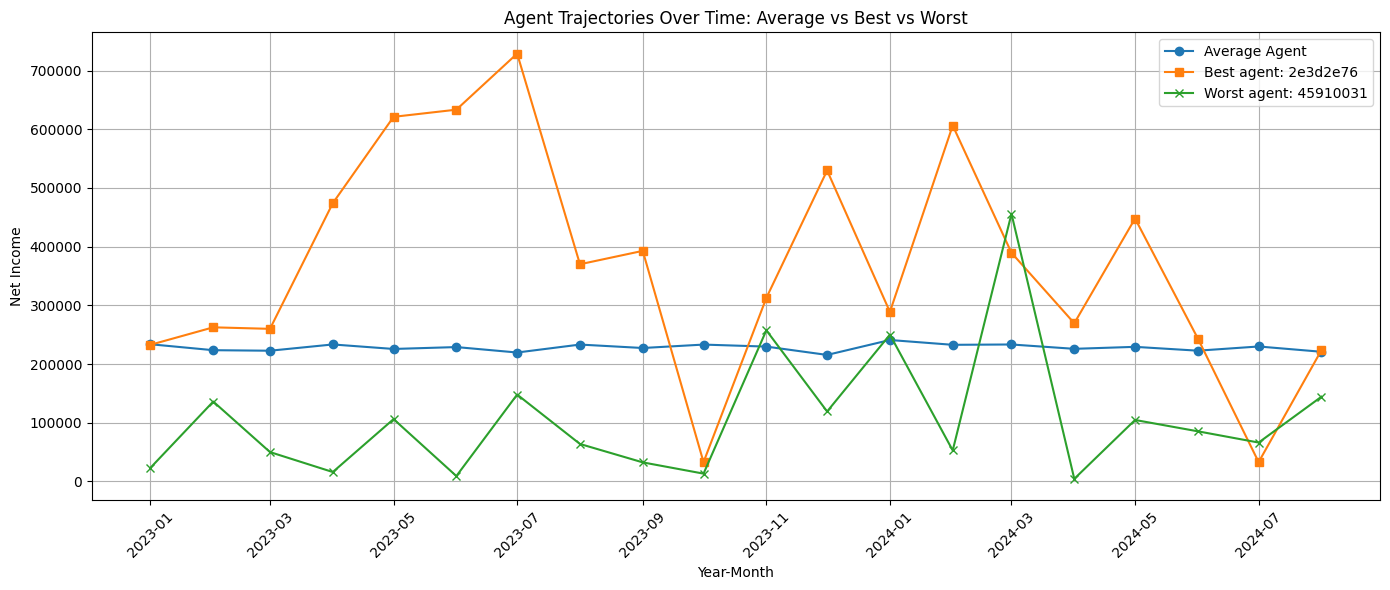

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_net_income'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_net_income'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_net_income'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('Net Income')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Number of Policy Holders over Time

In [41]:
avg_agent_trend = df.groupby('year_month')['number_of_policy_holders'].mean().reset_index()
avg_agent_trend.rename(columns={'number_of_policy_holders': 'avg_number_of_policy_holders'}, inplace=True)

agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['number_of_policy_holders'].sum()
best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 8f699df7
Worst agent: 838ca2b3


In [42]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'number_of_policy_holders']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'number_of_policy_holders']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'number_of_policy_holders': 'best_agent_number_of_policy_holders',
    'number_of_policy_holders_worst': 'worst_agent_number_of_policy_holders'
}, inplace=True)

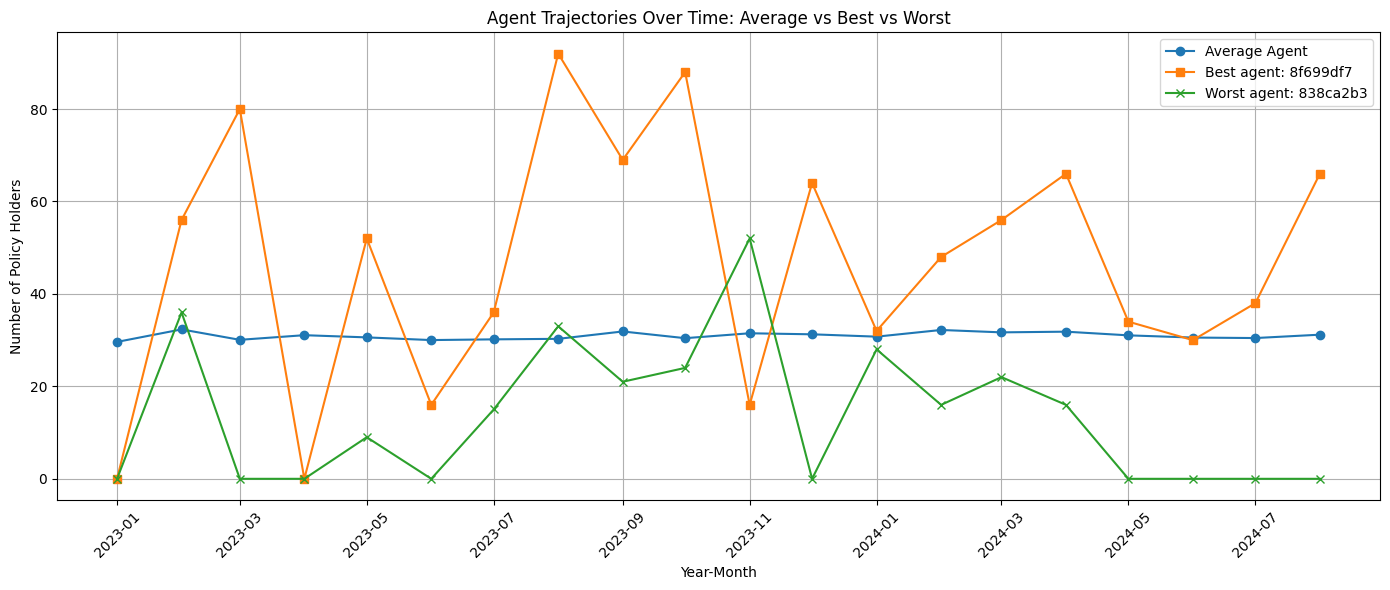

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_number_of_policy_holders'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_number_of_policy_holders'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_number_of_policy_holders'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('Number of Policy Holders')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unique Proposals Over Time

In [44]:
avg_agent_trend = df.groupby('year_month')['unique_proposal'].mean().reset_index()
avg_agent_trend.rename(columns={'unique_proposal': 'avg_unique_proposal'}, inplace=True)

agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['unique_proposal'].sum()
best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 9caee735
Worst agent: 3af761d0


In [45]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'unique_proposal']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'unique_proposal']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'unique_proposal': 'best_agent_unique_proposal',
    'unique_proposal_worst': 'worst_agent_unique_proposal'
}, inplace=True)

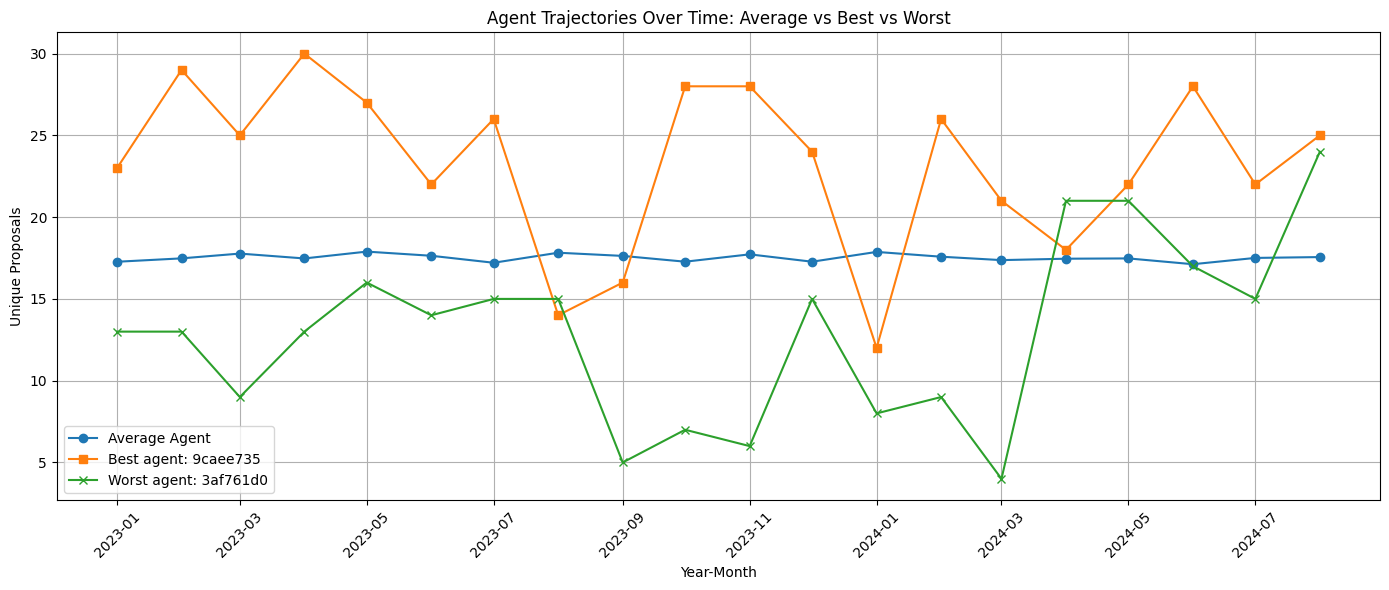

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_unique_proposal'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_unique_proposal'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_unique_proposal'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('Unique Proposals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unique Quotations Over Time

In [47]:
avg_agent_trend = df.groupby('year_month')['unique_quotations'].mean().reset_index()
avg_agent_trend.rename(columns={'unique_quotations': 'avg_unique_quotations'}, inplace=True)

agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['unique_quotations'].sum()
best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: 79c98d49
Worst agent: d125cd5b


In [48]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'unique_quotations']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'unique_quotations']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'unique_quotations': 'best_agent_unique_quotations',
    'unique_quotations_worst': 'worst_agent_unique_quotations'
}, inplace=True)

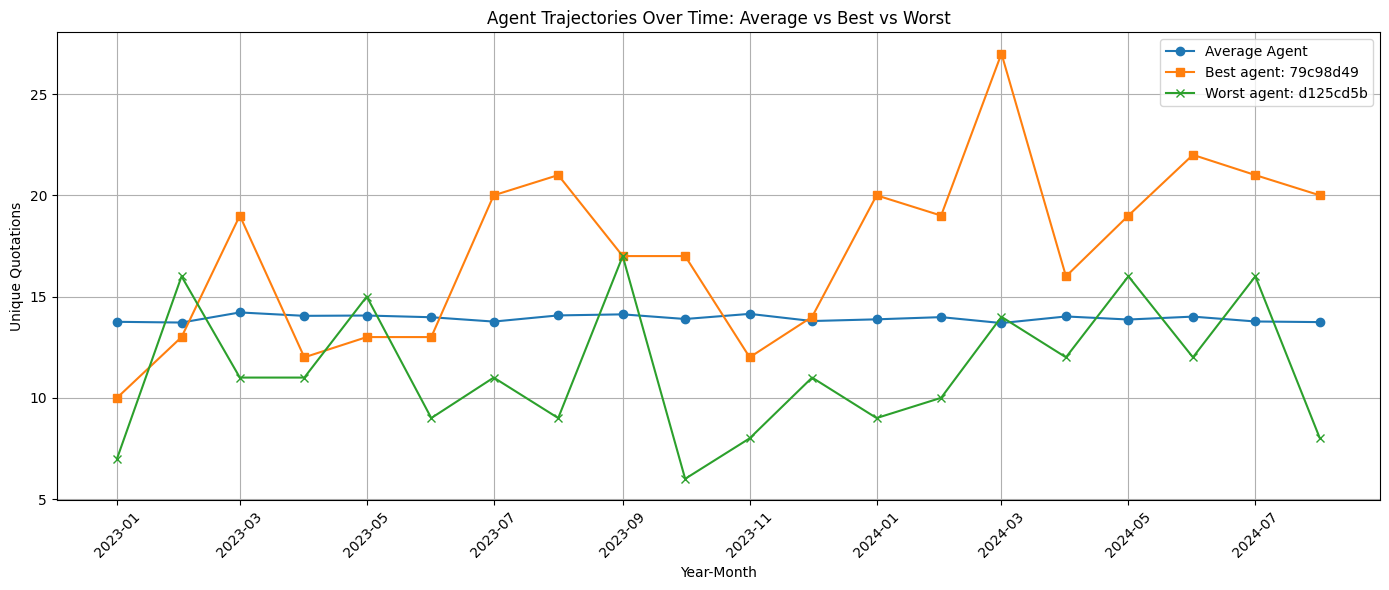

In [49]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_unique_quotations'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_unique_quotations'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_unique_quotations'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('Unique Quotations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unique Customers Over Time

In [50]:
avg_agent_trend = df.groupby('year_month')['unique_customers'].mean().reset_index()
avg_agent_trend.rename(columns={'unique_customers': 'avg_unique_customers'}, inplace=True)

agent_month_counts = df.groupby('agent_code')['year_month'].nunique()
eligible_agents = agent_month_counts[agent_month_counts == 20].index
agent_totals = df[df['agent_code'].isin(eligible_agents)].groupby('agent_code')['unique_customers'].sum()
best_agent = agent_totals.idxmax()
worst_agent = agent_totals.idxmin()

print(f"Best agent: {best_agent}")
print(f"Worst agent: {worst_agent}")

Best agent: a500afe1
Worst agent: 5ccac519


In [51]:
best_agent_df = df[df['agent_code'] == best_agent][['year_month', 'unique_customers']]
worst_agent_df = df[df['agent_code'] == worst_agent][['year_month', 'unique_customers']]

plot_df = avg_agent_trend.copy()
plot_df = plot_df.merge(best_agent_df, on='year_month', how='left', suffixes=('', '_best'))
plot_df = plot_df.merge(worst_agent_df, on='year_month', how='left', suffixes=('', '_worst'))
plot_df.rename(columns={
    'unique_customers': 'best_agent_unique_customers',
    'unique_customers_worst': 'worst_agent_unique_customers'
}, inplace=True)

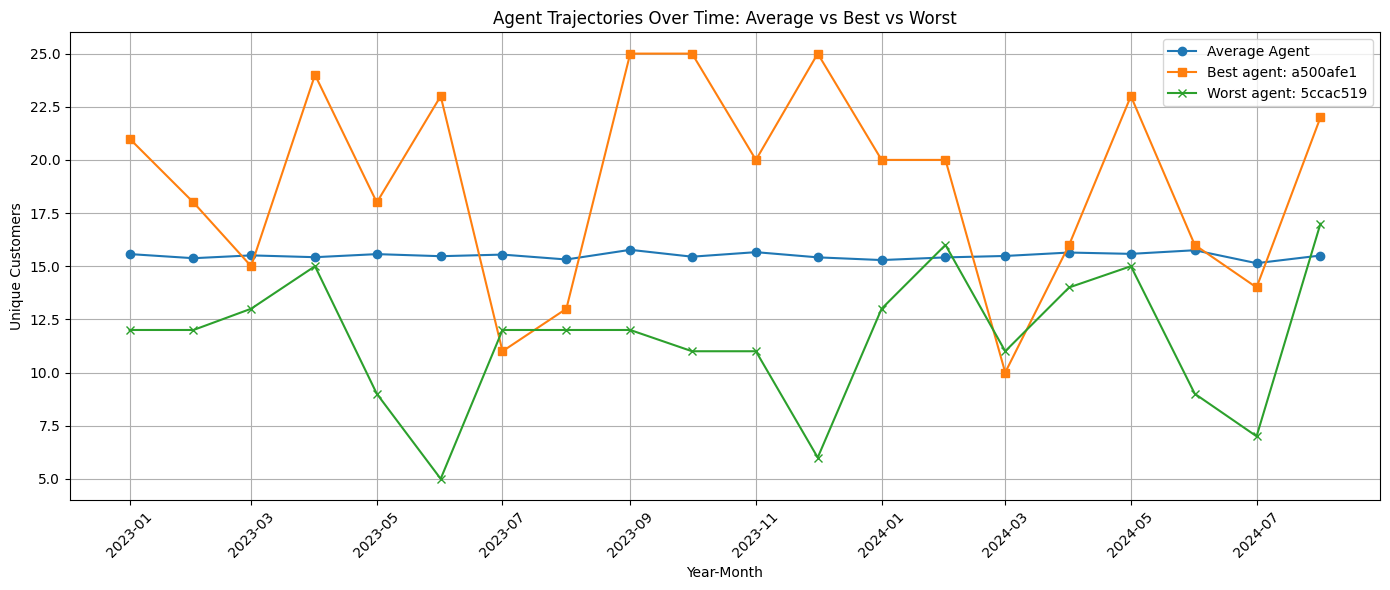

In [52]:
plt.figure(figsize=(14, 6))
plt.plot(plot_df['year_month'], plot_df['avg_unique_customers'], label='Average Agent', marker='o')
plt.plot(plot_df['year_month'], plot_df['best_agent_unique_customers'], label=f"Best agent: {best_agent}", marker='s')
plt.plot(plot_df['year_month'], plot_df['worst_agent_unique_customers'], label=f"Worst agent: {worst_agent}", marker='x')
plt.title('Agent Trajectories Over Time: Average vs Best vs Worst')
plt.xlabel('Year-Month')
plt.ylabel('Unique Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis

**In all the above graphs, although the worst agent and the best agent have fluctuations, on average the agents are consistent along every format.**

# Innovative EDA

## Agent Performance Cohorts

* Group agents based on their career stage (e.g., months since joining) and analyze performance over time.
* This will be helpful in determining how long it takes for agents to ramp up or plateau.

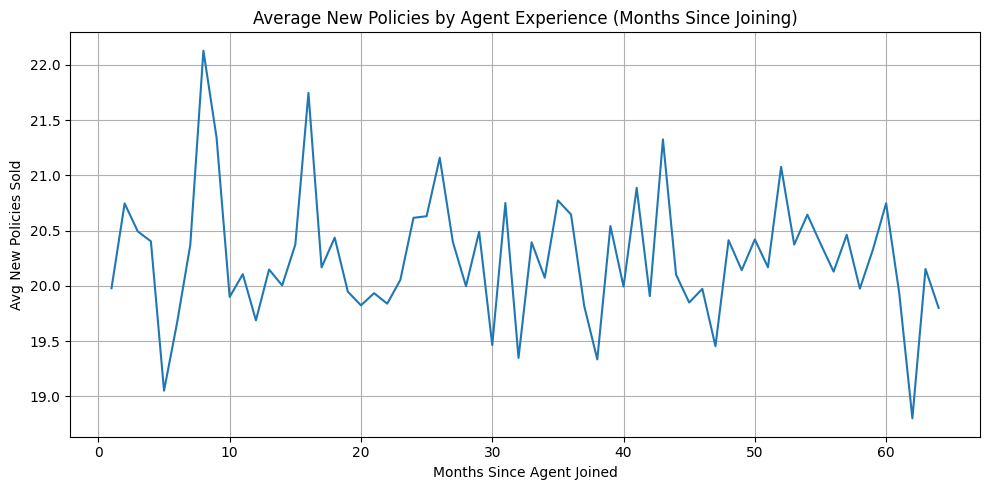

In [53]:
df['agent_join_month'] = pd.to_datetime(df['agent_join_month'], format='%m/%d/%Y')
df['months_since_join'] = ((df['year_month'].dt.year - df['agent_join_month'].dt.year) * 12 + 
                           (df['year_month'].dt.month - df['agent_join_month'].dt.month))

cohort_performance = df.groupby('months_since_join')['new_policy_count'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=cohort_performance, x='months_since_join', y='new_policy_count')
plt.title('Average New Policies by Agent Experience (Months Since Joining)')
plt.xlabel('Months Since Agent Joined')
plt.ylabel('Avg New Policies Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

**Overall Trends** <br>
* The average number of new policies sold fluctuates between approximately 1.95 and 2.15 over the 60-month period.
* There is no clear long-term upward or downward trend; instead, the data exhibits short-term variability with several peaks and troughs.
* Within the first 10 months, there’s a noticeable spike. This suggests a rapid ramp-up period where new agents are most productive early on.
* After this initial peak, the average drops to around 20 by 10-15 months, indicating a potential adjustment or stabilization phase.
* Between 15 and 40 months, the average oscillates between 19.5 and 21, with several minor peaks and dips. These fluctuations might reflect seasonal effects, training cycles, or market conditions affecting agent performance.
* After 40 months, the average shows a more pronounced downward trend, dropping to around 19-20 by 60 months. This suggests that agent performance may decline with longer tenure, possibly due to burnout, reduced motivation, or shifts in focus.
* The range of variation is relatively small compared to the average. This indicates that while there are fluctuations, the overall productivity remains fairly stable across experience levels.

<br>
<br>

* The peak at 5-7 months indicates that agents are most effective shortly after joining, likely due to initial training, enthusiasm, or targeted support. This aligns with the idea that new agents need time to build a client base but can hit peak performance early.
* After the initial ramp-up, performance stabilizes with minor fluctuations, suggesting a plateau phase. The decline after 40 months could indicate that experienced agents may need re-engagement strategies or that the market saturates for long-tenured agents.
* The short-term spikes and dips might suggest external factors (e.g. seasonal campaigns, economic changes) or individual agent variability influencing performance.
* Agents with longer tenure (e.g., >40 months) showing a decline might be at higher risk of becoming "One Month NILL" due to reduced activity. Also new agents (<10 months) with declining performance could also be vulnerable.

## Agent Behavioral Clustering

* Use K-Means to cluster agents by behavior (avg ANBP, frequency, income, etc.)
* Helps identify types of agents (e.g. "volume-driven", "high-ticket", or "inactive").

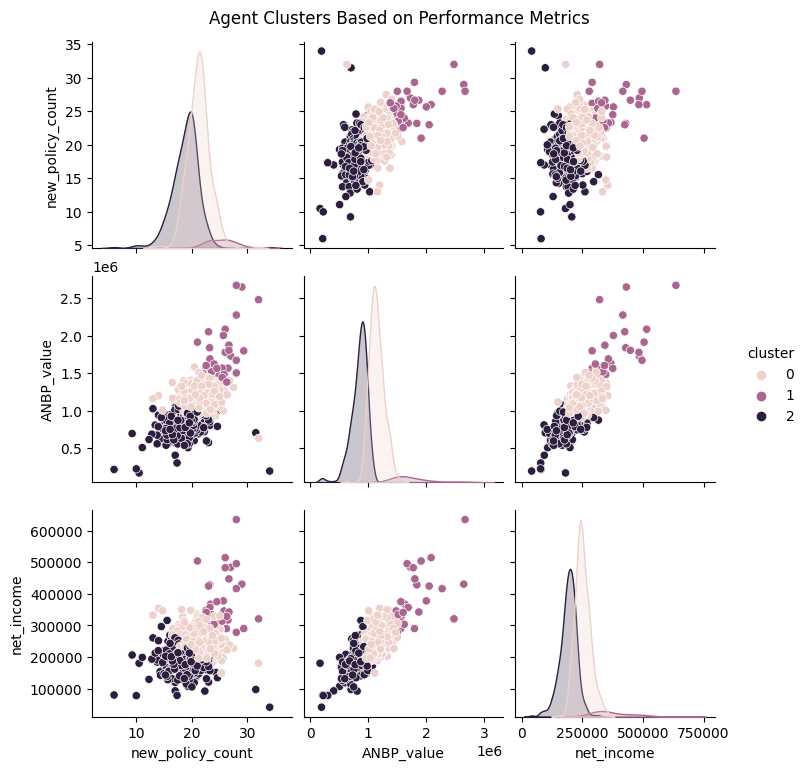

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

agent_features = df.groupby('agent_code')[['new_policy_count', 'ANBP_value', 'net_income']].mean()
scaler = StandardScaler()
scaled = scaler.fit_transform(agent_features)

kmeans = KMeans(n_clusters=3, random_state=42)
agent_features['cluster'] = kmeans.fit_predict(scaled)

# Visualize in 2D
sns.pairplot(agent_features.reset_index(), hue='cluster')
plt.suptitle("Agent Clusters Based on Performance Metrics", y=1.02)
plt.show()

Cluster Distribution and Characteristics
1. Cluster 2 
Diagonals: <br>
* new_policy_count: Peaks at 25.
* ANBP_value: Peaks near 2*1e6.
* net_income: Peaks near 500000.
* Suggests that these agents are strong performers, selling a significant number of policies and generating high revenue.
Scatter Plots (Consider the lower triangular part): <br>
* Points are tightly clustered in all pairwise plots.
  
2. Cluster 1:
Diagonals: <br>
* new_policy_count: Peaks around near zero, with a left-skewed distribution.
* ANBP_value: Peaks around near 0.
* net_income: Peaks around near 0 with a right-skewed distribution.
* Agents in this cluster have very low performance metrics, with a few outliers achieving higher income.
Scatter Plots: <br>
* The spread is wider, with some outliers at the extreme ends.
* This cluster matches the "Inactive" profile.


3. Cluster 0:
Diagonals: <br>
* new_policy_count: Peaks around 35.
* ANBP_value: Peaks around 2.5*1e6.
* net_income: Peaks around 600,000.
* Highest performance across all metrics
Scatter Plots: <br>
* Points are between Cluster 1 and 2. Points are generally in the mid-range of all metrics, with some variability.
* Cluster 0 is likely a "Top-Performer" cluster.


<br>
Some of the observations in the above are inconsitent. This might be due to the use of k-means clustering.


## Agent Consistency Score

* Calculate standard deviation of policy sales per agent.
* Flags agents who are volatile vs. those with consistent sales.

In [58]:
agent_variability = df.groupby('agent_code')['new_policy_count'].agg(['mean', 'std'])
agent_variability['consistency'] = agent_variability['std'] / agent_variability['mean']

top_consistent = agent_variability.sort_values('consistency').head(5)
print("Most consistent agents:\n", top_consistent)

Most consistent agents:
                  mean       std  consistency
agent_code                                  
272f6f80    31.500000  0.707107     0.022448
0b5ebeaa    22.666667  0.577350     0.025471
0aacb7a8    19.666667  0.577350     0.029357
5e72ea09    19.500000  0.707107     0.036262
9dc48356    20.000000  1.000000     0.050000


In [60]:
top_inconsistent = agent_variability.sort_values('consistency', ascending=False).head(5)
print("Agents with the worst consistency:\n", top_inconsistent)

Agents with the worst consistency:
                  mean        std  consistency
agent_code                                   
862e2590     6.000000  10.392305     1.732051
ff955d18    13.000000  18.384776     1.414214
88feb000    11.076923  13.524432     1.220956
4a8112fe    10.500000  12.369317     1.178030
3ce8e9ed     9.250000  10.688779     1.155544


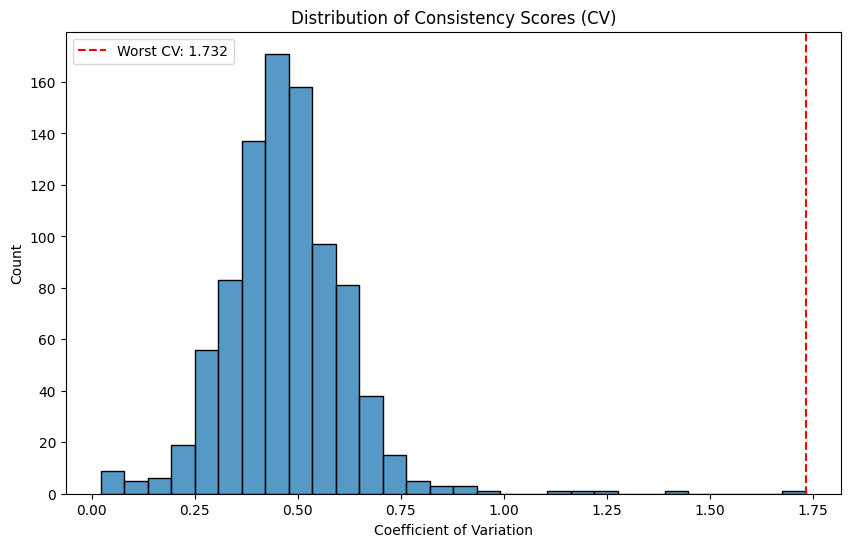

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=agent_variability, x='consistency', bins=30)
plt.axvline(x=top_inconsistent['consistency'].iloc[0], color='r', linestyle='--', label=f'Worst CV: {top_inconsistent["consistency"].iloc[0]:.3f}')
plt.title('Distribution of Consistency Scores (CV)')
plt.xlabel('Coefficient of Variation')
plt.ylabel('Count')
plt.legend()
plt.show()

* These agents are at a low risk of becoming NILL due to their consistent high sales. Their CVs are well below typical thresholds for volatility (e.g. CV > 0.75 might indicate high volatility).
Agents with higher CVs are likely more volatile and could be flagged for further monitoring.

## Week-Based Performance Volatility

* Use 7/15/21-day windows in the dataset to calculate short-term spikes.
* Shows how quickly agents can ramp or drop activity.

In [62]:
df['weekly_volatility'] = df[['unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days']].std(axis=1)

high_vol_agents = df[['agent_code', 'weekly_volatility']].groupby('agent_code').mean().sort_values('weekly_volatility', ascending=False).head()
print("Agents with most volatile short-term activity:\n", high_vol_agents)

Agents with most volatile short-term activity:
             weekly_volatility
agent_code                   
31e59316             8.736895
c54be95a             8.386497
ac15ff9e             7.985560
c21ae5a1             7.937254
272f6f80             7.924506


* High volatility in proposal activity could lead to periods of low activity, reducing the likelihood of converting proposals to policies (new_policy_count). Agents who drop to near-zero proposals in a short window are at higher risk of NILL status, as fewer proposals likely translate to fewer sales.

## Agent Momentum Detection

* For each agent, compare current month performance to rolling 3-month average.
* Detects who is improving or declining rapidly.

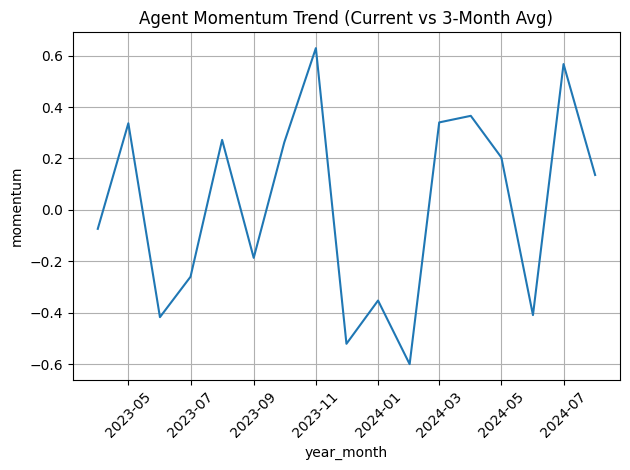

In [63]:
df = df.sort_values(['agent_code', 'year_month'])
df['rolling_mean'] = df.groupby('agent_code')['new_policy_count'].transform(lambda x: x.shift().rolling(3).mean())
df['momentum'] = df['new_policy_count'] - df['rolling_mean']

momentum_trend = df.groupby('year_month')['momentum'].mean().reset_index()
sns.lineplot(data=momentum_trend, x='year_month', y='momentum')
plt.title("Agent Momentum Trend (Current vs 3-Month Avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* This can be used to detect agents who are improving or declining rapidly.
* A positive momentum (e.g., 5) indicates the agent is performing better this month than their recent average (improving).
* A negative momentum (e.g., -5) indicates the agent is underperforming compared to their recent average (declining).
* A momentum near 0 suggests stable performance.
* The momentum column in the DataFrame provides a month-by-month indicator of each agent’s performance relative to their recent history.
* The line plot shows the average momentum across all agents over time, revealing overall trends (for example a rising line indicates collective improvement and a falling line indicates collective decline).

<br>

* The average momentum fluctuates between -0.6 and +0.6, indicating that, on average, agents’ performance (pertaining to new policy count) relative to their recent 3-month average is relatively stable but with short-term variations.
* The momentum generally hovers around 0, suggesting that most agents maintain a consistent performance level compared to their recent history, with periodic improvements or declines.